## Part 0: Import packages

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


## Part 1: Read the nCounter csv file

In [2]:
# set the file path

dir_data = '../data/191021'
filename='NR1 data.csv'
f_app = os.path.join(dir_data, filename)
print('Path of read in data: %s' % (f_app))
IBD_table = pd.read_csv(f_app)
IBD_table.head()

Path of read in data: ../data/191021/NR1 data.csv


,Probe Name,Accession #,NS Probe ID,Class Name,Analyte Type,% Samples above Threshold,Annotation,PBMC mock1,PBMC mock2,PBMC mock3,...,A1 24h3,A2 24h1,A2 24h2,A2 24h3,B1 24h1,B1 24h2,B1 24h3,B2 24h1,B2 24h2,B2 24h3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AANAT,NM_001088.2,AANAT,Endogenous,mRNA,0.00,NaN,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
3,ABCA1,NM_005502.3,ABCA1,Endogenous,mRNA,82.69,NaN,20.00,86.84,71.12,...,71.15,50.01,75.71,82.55,154.39,135.98,153.46,20.00,142.27,97.51
4,ABR,NM_001092.4,ABR,Endogenous,mRNA,88.46,NaN,320.17,537.95,522.27,...,276.11,301.68,296.49,296.54,645.92,619.77,537.19,468.66,442.68,458.59


## Part 2: Data preprocessing

In [3]:
for i in IBD_table.columns[1:7]:
    print(i)
    IBD_table=IBD_table.drop([i], axis=1)

IBD_table.head()

Accession #
NS Probe ID
Class Name
Analyte Type
% Samples above Threshold
Annotation


,Probe Name,PBMC mock1,PBMC mock2,PBMC mock3,A1 6h1,A1 6h2,A1 6h3,A2 6h1,A2 6h2,A2 6h3,...,A1 24h3,A2 24h1,A2 24h2,A2 24h3,B1 24h1,B1 24h2,B1 24h3,B2 24h1,B2 24h2,B2 24h3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AANAT,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
3,ABCA1,20.00,86.84,71.12,86.56,111.48,83.18,97.33,89.23,90.91,...,71.15,50.01,75.71,82.55,154.39,135.98,153.46,20.00,142.27,97.51
4,ABR,320.17,537.95,522.27,370.64,344.96,316.07,432.56,415.56,417.19,...,276.11,301.68,296.49,296.54,645.92,619.77,537.19,468.66,442.68,458.59


In [4]:
# get the samples colunm names

cl_list=[]
for i in IBD_table.columns[1:]:

    if i[:-1] in cl_list:
        continue
    else:
        cl_list.append(i[:-1])
        
print(cl_list)

['PBMC mock', 'A1 6h', 'A2 6h', 'B1 6h', 'B2 6h', 'A1 24h', 'A2 24h', 'B1 24h', 'B2 24h']


In [5]:
table_col=['Probe Name']
table_col.extend(cl_list)
len(table_col)
len(IBD_table['Probe Name'][2:])

171

## Part 3: Mean of Mock

In [6]:
# the mean of MOCK
for j in cl_list[0:]:
    mean_col=[]
    std_col=[]
    for i in range(2, len(IBD_table['Probe Name'])):
        var_list=[]
        var_list.append(float(IBD_table[j+'1'][i]))
        var_list.append(float(IBD_table[j+'2'][i]))
        var_list.append(float(IBD_table[j+'3'][i]))
        
        df_group_test=pd.DataFrame(var_list)
        mean_col.append(float(df_group_test.mean().get_values()))
        
    if j == cl_list[0]:
        df_index_col=pd.DataFrame(list(IBD_table['Probe Name'][2:]))
        df_m_0=pd.DataFrame(mean_col)
        df1_m_test0=pd.concat([df_index_col, df_m_0], axis=1)       
        
    else:
        n=1
        while n <= 3:
            df_m_0=pd.DataFrame(list(IBD_table[j+str(n)][2:]))
            df1_m_test0=pd.concat([df1_m_test0, df_m_0], axis=1)
            n+=1
        
table_index=[]
for i in IBD_table['Probe Name'][2:]:
    table_index.append(i)
df_index=pd.DataFrame({'index':table_index})
df1_m_test0=df1_m_test0.rename(index=df_index['index'])
table_col=['Probe Name', 'MOCK']
table_col.extend(IBD_table.columns[4:])
df1_m_test0.columns=table_col
df1_m_test0=df1_m_test0.drop(columns=['Probe Name'])

df1_m_test0.head()

,MOCK,A1 6h1,A1 6h2,A1 6h3,A2 6h1,A2 6h2,A2 6h3,B1 6h1,B1 6h2,B1 6h3,...,A1 24h3,A2 24h1,A2 24h2,A2 24h3,B1 24h1,B1 24h2,B1 24h3,B2 24h1,B2 24h2,B2 24h3
AANAT,20.000000,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
ABCA1,59.320000,86.56,111.48,83.18,97.33,89.23,90.91,113.44,121.33,93.04,...,71.15,50.01,75.71,82.55,154.39,135.98,153.46,20.00,142.27,97.51
ABR,460.130000,370.64,344.96,316.07,432.56,415.56,417.19,494.84,467.97,378.16,...,276.11,301.68,296.49,296.54,645.92,619.77,537.19,468.66,442.68,458.59
ACC (ACACA),20.000000,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
AIFM1,49.213333,51.21,38.91,48.52,52.27,44.61,47.08,54.77,50.07,20.00,...,37.45,45.25,46.49,35.12,36.02,36.67,38.86,20.00,49.64,48.16


## Part 4: Normalization: samples / mock

In [7]:
# Normalization: samples / mock

for i in range(0,len(df1_m_test0.columns)):
    temp=[]
    for j in range(len(table_index)):

        a=df1_m_test0.at[table_index[j],df1_m_test0.columns[i]]
        b=df1_m_test0.at[table_index[j],df1_m_test0.columns[0]]
        val=float(a)/float(b)
        temp.append(val)
        
    if i == 0:
        df_temp=pd.DataFrame(temp)
        ndf1_test=df_temp
    if i > 0:
        df_temp=pd.DataFrame(temp)
        ndf1_test=pd.concat([ndf1_test, df_temp], axis=1)
        
ndf1_test.columns=table_col[1:]
df_index=pd.DataFrame({'index':table_index})
ndf1_test=ndf1_test.rename(index=df_index['index'])
ndf1_test.head()

,MOCK,A1 6h1,A1 6h2,A1 6h3,A2 6h1,A2 6h2,A2 6h3,B1 6h1,B1 6h2,B1 6h3,...,A1 24h3,A2 24h1,A2 24h2,A2 24h3,B1 24h1,B1 24h2,B1 24h3,B2 24h1,B2 24h2,B2 24h3
AANAT,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ABCA1,1.0,1.459204,1.879299,1.402225,1.640762,1.504214,1.532535,1.912340,2.045347,1.568442,...,1.199427,0.843055,1.276298,1.391605,2.602664,2.292313,2.586986,0.337154,2.398348,1.643796
ABR,1.0,0.805511,0.749701,0.686915,0.940082,0.903136,0.906679,1.075435,1.017039,0.821855,...,0.600070,0.655641,0.644361,0.644470,1.403777,1.346945,1.167474,1.018538,0.962076,0.996653
ACC (ACACA),1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AIFM1,1.0,1.040572,0.790639,0.985912,1.062111,0.906462,0.956651,1.112910,1.017407,0.406394,...,0.760973,0.919466,0.944663,0.713628,0.731915,0.745123,0.789623,0.406394,1.008670,0.978597


## Part 5: Mean of samples ( with 3 replicates )

In [8]:
######
# Mean
######


for j in cl_list:
    
    mean_col=[]
    std_col=[]
    
    mock_list=[1,1,1]
    p_list=[]
    
    for i in table_index:
        
        if j == cl_list[0]:
            var_list=[1,1,1]
            df_group_test=pd.DataFrame(var_list)
            mean_col.append(float(df_group_test.mean().get_values()))
            std_col.append(float(df_group_test.std().get_values()))
        
        else:
            var_list=[]
            var_list.append(float(ndf1_test[j+'1'][i]))
            var_list.append(float(ndf1_test[j+'2'][i]))
            var_list.append(float(ndf1_test[j+'3'][i]))
        
            df_group_test=pd.DataFrame(var_list)
            mean_col.append(float(df_group_test.mean().get_values()))
            std_col.append(float(df_group_test.std().get_values()))   

            p_value=ttest_ind(mock_list, var_list)[1]
            p_list.append(p_value)
            
    if j == cl_list[0]:
        df_m_0=pd.DataFrame(mean_col)
        df1_mean=df_m_0

        df_s_0=pd.DataFrame(std_col)
        df1_std=df_s_0       
        
    else:
        df_m_0=pd.DataFrame(mean_col)
        df1_mean=pd.concat([df1_mean, df_m_0], axis=1)

        df_s_0=pd.DataFrame(std_col)
        df1_std=pd.concat([df1_std, df_s_0], axis=1)
        
        if j == cl_list[1]:
            df1_p=pd.DataFrame(p_list)
        else:
            df_p_0=pd.DataFrame(p_list)
            df1_p=pd.concat([df1_p, df_p_0], axis=1)

df_index=pd.DataFrame({'index':table_index})
df1_mean=df1_mean.rename(index=df_index['index'])
table_col=[]
table_col.extend(cl_list)
df1_mean.columns=cl_list

# output the file with mean
#df1_mean.to_csv('nCounter_mean_table.csv')
df1_mean.head()


,PBMC mock,A1 6h,A2 6h,B1 6h,B2 6h,A1 24h,A2 24h,B1 24h,B2 24h
AANAT,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ABCA1,1.0,1.580243,1.559171,1.842043,1.819004,1.167791,1.170319,2.493987,1.459766
ABR,1.0,0.747376,0.916632,0.971443,1.374532,0.596665,0.648157,1.306066,0.992422
ACC (ACACA),1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AIFM1,1.0,0.939041,0.975075,0.845570,0.822812,0.623611,0.859252,0.755554,0.797887


In [9]:
#for j in cl_list[0:]:
#    mean_col=[]
#    std_col=[]
#    for i in range(2, len(IBD_table['Probe Name'])):
#        var_list=[]
#        var_list.append(float(IBD_table[j+'1'][i]))
#        var_list.append(float(IBD_table[j+'2'][i]))
#        var_list.append(float(IBD_table[j+'3'][i]))
#        
#        df_group_test=pd.DataFrame(var_list)
#        mean_col.append(float(df_group_test.mean().get_values()))
#        std_col.append(float(df_group_test.std().get_values()))
#        #print(j, var_list, float(df_group_test.mean().get_values()))
#        
#    if j == cl_list[0]:
#        df_index_col=pd.DataFrame(list(IBD_table['Probe Name'][2:]))
#        df_m_0=pd.DataFrame(mean_col)
#        df1_m_test0=pd.concat([df_index_col, df_m_0], axis=1)

#        df_s_0=pd.DataFrame(std_col)
#        df1_s_test0=pd.concat([df_index_col, df_s_0], axis=1)        
        
#    else:
#        df_m_0=pd.DataFrame(mean_col)
#        df1_m_test0=pd.concat([df1_m_test0, df_m_0], axis=1)

#        df_s_0=pd.DataFrame(std_col)
#        df1_s_test0=pd.concat([df1_s_test0, df_s_0], axis=1)
        
        #print(IBD_table['Probe Name'][i], IBD_table[j+'1'][i],IBD_table[j+'2'][i],IBD_table[j+'3'][i])
        #print(IBD_table['Probe Name'][i], IBD_table[j][i])

        
#table_index=[]
#for i in IBD_table['Probe Name'][2:]:
#    table_index.append(i)
#df_index=pd.DataFrame({'index':table_index})
#df1_m_test0=df1_m_test0.rename(index=df_index['index'])
#table_col=['Probe Name']
#table_col.extend(cl_list)
#df1_m_test0.columns=table_col
#df1_m_test0=df1_m_test0.drop(columns=['Probe Name'])

#df1_m_test0

## Part 6: Standard deviation of samples

In [10]:
#####################
# standard deviation
#####################

df_index=pd.DataFrame({'index':table_index})
df1_std=df1_std.rename(index=df_index['index'])
df1_std.columns=cl_list

# output the std file
#df1_std.to_csv('nCounter_std_table.csv')
df1_std.head()

,PBMC mock,A1 6h,A2 6h,B1 6h,B2 6h,A1 24h,A2 24h,B1 24h,B2 24h
AANAT,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA1,0.0,0.260552,0.072065,0.246101,1.286157,0.095146,0.289224,0.174831,1.042847
ABR,0.0,0.059333,0.020385,0.132797,0.237685,0.008483,0.006481,0.123341,0.028468
ACC (ACACA),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AIFM1,0.0,0.131393,0.079443,0.383324,0.362091,0.119463,0.126742,0.030235,0.339376


## Part 7: p-value of samples

In [11]:
df_index=pd.DataFrame({'index':table_index})
df1_p=df1_p.rename(index=df_index['index'])
df1_p.columns=cl_list[1:]

# out the p-value file
#df1_p.to_csv('nCounter_p_table.csv')
df1_p.head()

,A1 6h,A2 6h,B1 6h,B2 6h,A1 24h,A2 24h,B1 24h,B2 24h
AANAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABCA1,0.018190,0.000177,0.004062,0.331946,3.786203e-02,3.654102e-01,0.000121,0.487649
ABR,0.001802,0.002097,0.728440,0.052482,1.303351e-07,7.669470e-08,0.012666,0.668726
ACC (ACACA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIFM1,0.466680,0.615698,0.523742,0.444414,5.480683e-03,1.267671e-01,0.000151,0.360584


## Part 8: Heatmap of samples

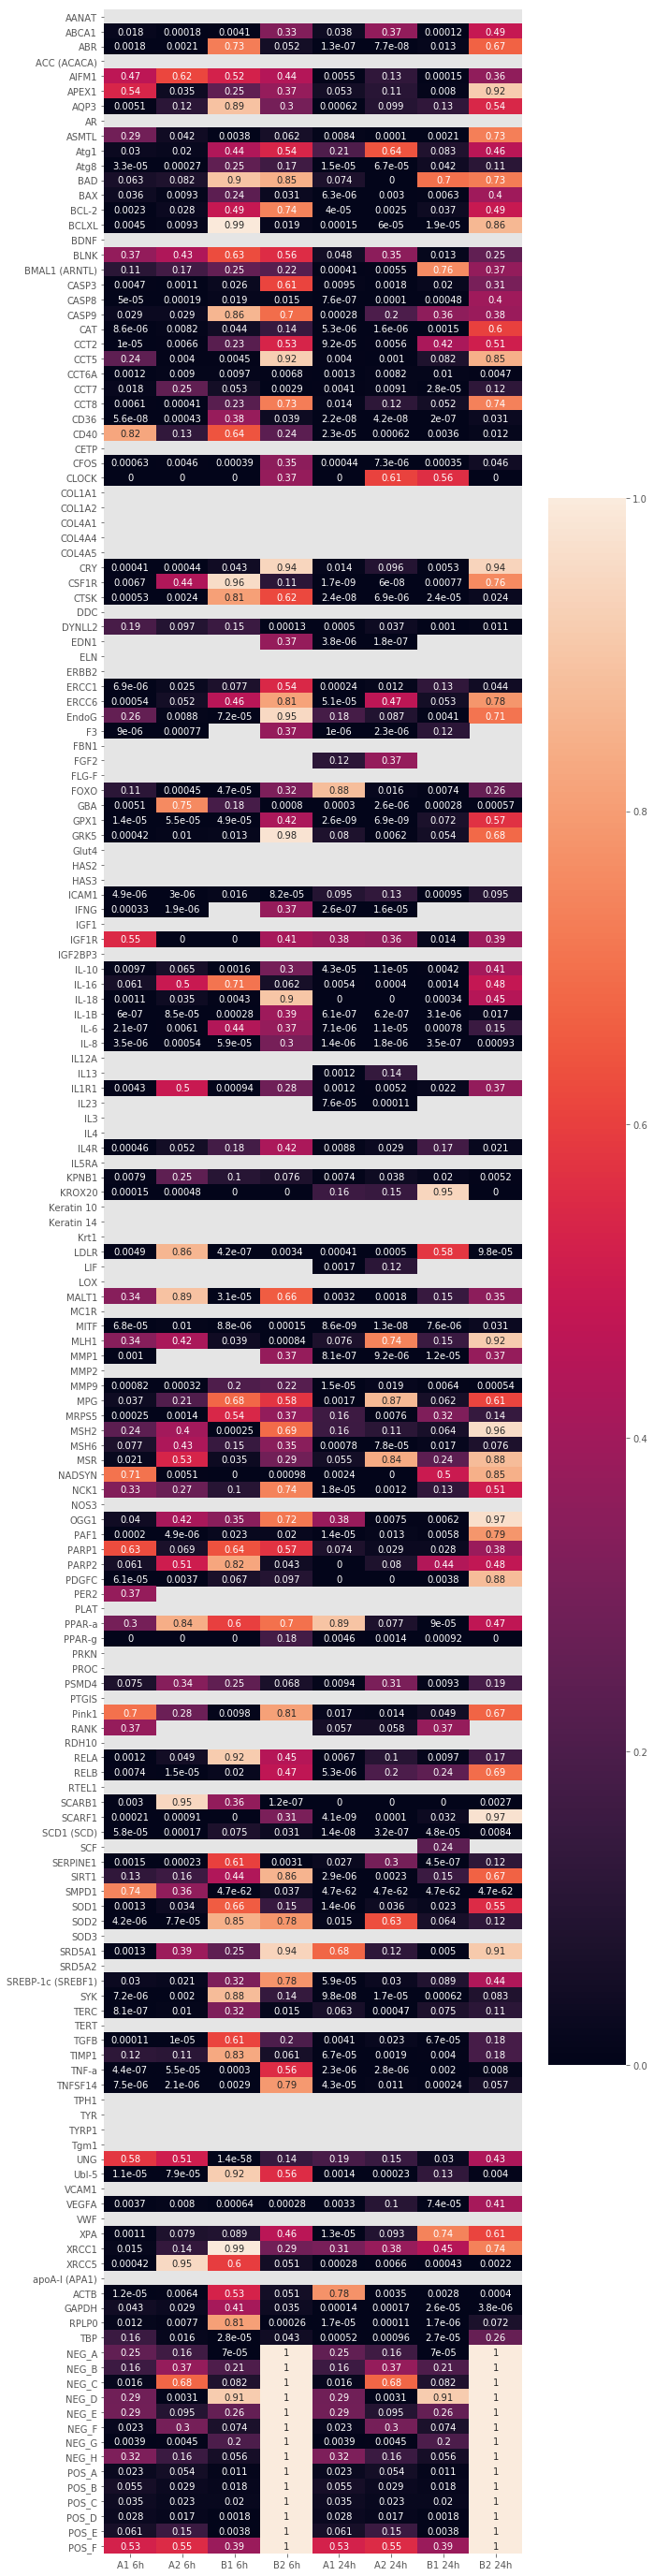

In [12]:
plt.figure(figsize=(10,50))
heatmap = sns.heatmap(data=df1_p, vmin = 0, annot = True, vmax = 1)
file_heatmap = "Heatmap_" + filename[:-4] + ".png"
plt.savefig(file_heatmap)
plt.show()
#annot = True,

## Part 9: Define the genetic groups

In [13]:
G1=['SOD1','SOD2','GPX1','CAT']
G2=['CCT2','CCT5','CCT6A','CCT7','CCT8','Pink1', 'Atg1','Atg8','SIRT1','FOXO','PARP1','PARP2','NADSYN','MRPS5','Ubl-5','SOD3'] #,'Parkin'
G3=['UNG','OGG1','MPG','APEX1','ERCC1','ERCC6','XPA','XRCC1','XRCC5','MSH2','MLH1','MSH6']
G4=['IL-1B','IL-8','IL-6','IL-10','IL-18','TNF-a']
G5=['IL-1B','IL-6','IL-8','SOD1','SOD2','GPX1']
G6=['VEGFA','CASP3','CASP8','IL-1B','IL-8','TNF-a']
G7=['TYR','TYRP1','MC1R','MITF']
G8=['COL1A1','COL1A2','COL4A1','COL4A4','COL4A5','MMP1','MMP9','MMP2','TIMP1','ELN','FBN1','LOX','HAS2','HAS3']
G9=['IL-1B','IL-8','IL-6','IL-10','IL-18','TNF-a','IL-16','IL23','IL12A','IFNG','TGFB','IL3','IL4']
G10=['BCL-2','BAX','BCLXL','BAD','CASP9','AIFM1','EndoG']
G11=['PTGIS','NOS3','EDN1','PLAT','PROC','VWF','F3','SERPINE1','PDGFC','FGF2','IGF2BP3','IGF1R','IL-8','IL-6','ICAM1','VCAM1','CASP8']
G12=['SIRT1','CLOCK','BMAL1 (ARNTL)','PER2','CRY','KPNB1']
G13=['ICAM1','VCAM1','IL-8','NOS3']
G14=['UNG','OGG1','MPG','APEX1','ERCC1','ERCC6','XPA','XRCC1','XRCC5','MSH2','MLH1','MSH6','SOD1','SOD2','GPX1','CAT']
G15=['Tgm1','Krt1','Keratin 10','Keratin 14','AQP3','FLG-F','SMPD1','GBA','HAS2','HAS3']
G16=['SREBP-1c (SREBF1)','PPAR-g','PPAR-a','SCD1 (SCD)','ACC (ACACA)']
G17=['CETP','SCARB1','apoA-I (APA1)','LDLR','ABCA1']
G18=['SRD5A1','SRD5A2','AR','KROX20','SCF','VEGFA','IGF1','TGFB','BDNF']
G19=['TERT','TERC','RTEL1']
G20=['CD40','ERBB2','LIF','MALT1','NCK1','PAF1','DYNLL2','GRK5','PSMD4','RDH10','RELB','SCARF1','TNFSF14','ABR','IL13','IL4R','IL5RA','RELA']

In [14]:
gene_fun_dic={'DG1':'抗氧化', 'DG2':'抗老', 'DG3':'DNA修復', 'DG4':'免疫', 'DG5':'護胃', 'DG6':'護眼', 'DG7':'美白-抗黑色素生成',
              'DG8':'膠原蛋白合成組合降解', 'DG9':'抗發炎', 'DG10':'細胞凋亡', 'DG11':'心血管保健', 'DG12':'晝夜節律',
              'DG13':'LPS模擬發炎反應', 'DG14':'非酒精性肝損傷', 'DG15':'皮膚角質保濕', 'DG16':'脂肪肝', 'DG17':'提升HDL', 
              'DG18':'健髮', 'DG19':'端粒酶活性', 'DG20':'呼吸道過敏'}


## Part 10: Barplots of each genetic groups

In [15]:
# barplots of each samples

whole_group=[G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20]

from matplotlib.font_manager import FontProperties # 步驟一
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20) # 步驟二

n=0
while n < len(whole_group):
    G_Name=whole_group[n]
    for i in range(len(G_Name)):
        if i == 0:
            plot_df=df1_mean.loc[G_Name[i]]
            std_df=df1_std.loc[G_Name[i]]
        else:
            plot_temp=df1_mean.loc[G_Name[i]]
            plot_df=pd.concat([plot_df, plot_temp], axis=1)
            
            std_temp=df1_std.loc[G_Name[i]]
            std_df=pd.concat([std_df, std_temp], axis=1)            
            
            plot_df_t=plot_df.transpose()
            std_df_t=std_df.transpose()
    
    current_palette = sns.cubehelix_palette(len(df1_mean.columns), start=.5, rot=-.75)
    
    fig, ax = plt.subplots(figsize=(20,8))
    with sns.color_palette(current_palette):
        plot_df_t.plot.bar(yerr=std_df_t, ax=ax, capsize=2)
        ax.set_facecolor('xkcd:salmon')
        ax.set_facecolor((1.0, 1, 1))
        #ax.set(xlabel=gene_fun_dic['DG'+str(n+1)], ylabel='Relative Expression Ratio')
        plt.xlabel(gene_fun_dic['DG'+str(n+1)], fontproperties=font)
        plt.ylabel("Relative Expression Ratio", fontproperties=font)
        #plt.title("標題", fontproperties=font)

        
        #建立 p-value 和 std 轉置表格
        for i in range(len(G_Name)):
            if i == 0:    
                p_df=df1_p.loc[G_Name[i]]
            else:
                p_temp=df1_p.loc[G_Name[i]]
                p_df=pd.concat([p_df, p_temp], axis=1)
        df_p_t=p_df.transpose()
        
        #建立對應n值的 p-value 和 std list
        pt_list=[]
        for i in range(len(plot_df_t[plot_df_t.columns[0]])):
            pt_list.append(1)

        for i in df_p_t.columns:
            for j in df_p_t.index:
                pt_list.append(df_p_t.at[j, i])
        #---------------------------------------------------#
        std_t_list=[]
        for i in std_df_t.columns:
            for j in std_df_t.index:
                std_t_list.append(std_df_t.at[j, i])
        m=0
        while m < len(ax.patches):
            r=ax.patches[m]
            if r.get_height() <= 500 and r.get_height() >1:
                if pt_list[m] <= 0.05 and pt_list[m] >= 0.01:
                    ax.text(r.get_x(),                 # x-position
                        r.get_height()+std_t_list[m] , # y-position 記得還要加std
                        '*', # text
                        fontsize=15, family="monospace", zorder=10)
                
                elif pt_list[m] <= 0.01 and pt_list[m] >= 0.001:
            
                    ax.text(r.get_x(), #-r.get_width(), # x
                        r.get_height()+std_t_list[m] , # y
                        '**', # text
                        fontsize=15, family="monospace", zorder=10)
                
                elif pt_list[m] <= 0.001:
                    ax.text(r.get_x(), #-r.get_width(), # x
                        r.get_height()+std_t_list[m] ,   # y
                        '***', # text
                        fontsize=15, family="monospace", zorder=10)
            m+=1
        plt.savefig('nCounter_G'+str(n+1)+'.png')
        plt.show()
    
    n+=1

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\windows\\fonts\\simsun.ttc'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a13c946a8> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\windows\\fonts\\simsun.ttc'

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\windows\\fonts\\simsun.ttc'

<Figure size 1440x576 with 1 Axes>

## Part 11: Label the statistic result with genetic groups

In [43]:
gene_fun_dic={'G1':'抗氧化', 'G2':'抗老', 'G3':'DNA修復', 'G4':'免疫', 'G5':'護胃', 'G6':'護眼', 'G7':'美白-抗黑色素生成',
              'G8':'膠原蛋白合成組合降解', 'G9':'抗發炎', 'G10':'細胞凋亡', 'G11':'心血管保健', 'G12':'晝夜節律',
              'G13':'LPS模擬發炎反應', 'G14':'非酒精性肝損傷', 'G15':'皮膚角質保濕', 'G16':'脂肪肝', 'G17':'提升HDL', 
              'G18':'健髮', 'G19':'端粒酶活性', 'G20':'呼吸道過敏'}


In [44]:
####################
# Add the group name
####################

# concate all the gene with group order

gene = G1 + G2 + G3 + G4 + G5 + G6 + G7 + G8 + G9 + G10 + G11 + G12 + G13 + G14 + G15 + G16 + G17 + G18 + G19 + G20
gene_group = ["G1"]*len(G1) + ["G2"]*len(G2) + ["G3"]*len(G3) + ["G4"]*len(G4) + ["G5"]*len(G5) + ["G6"]*len(G6) + ["G7"]*len(G7) + ["G8"]*len(G8) + ["G9"]*len(G9) + ["G10"]*len(G10) + ["G11"]*len(G11) + ["G12"]*len(G12) + ["G13"]*len(G13) + ["G14"]*len(G14) + ["G15"]*len(G15) + ["G16"]*len(G16) + ["G17"]*len(G17) + ["G18"]*len(G18) + ["G19"]*len(G19) + ["G20"]*len(G20) 


# add the group chinese name
gene_group_CN = []
for i in range(len(gene_group)):
    
    gene_group_CN.append(gene_fun_dic[gene_group[i]])


## Part 12: Ordered mean of samples

In [45]:
#####################    
# mean in group order
#####################

mean = []
for i in range(len(gene)):
    mean.append(df1_mean.loc[gene[i]])
    
    
df_mean = pd.DataFrame(mean)
df_mean['Gene Group'] = gene_group_CN

df_mean.head()

df_mean.shape
#df_mean.to_csv("mean.csv")

(181, 10)

In [46]:
##################################
# order the mean by genetic groups
##################################

gr1 = df_mean.loc[df_mean["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_mean.loc[df_mean["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_mean.loc[df_mean["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_mean.loc[df_mean["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_mean.loc[df_mean["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_mean.loc[df_mean["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_mean.loc[df_mean["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_mean.loc[df_mean["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_mean.loc[df_mean["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_mean.loc[df_mean["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_mean.loc[df_mean["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_mean.loc[df_mean["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_mean.loc[df_mean["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_mean.loc[df_mean["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_mean.loc[df_mean["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_mean.loc[df_mean["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_mean.loc[df_mean["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_mean.loc[df_mean["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_mean.loc[df_mean["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_mean.loc[df_mean["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)


mean = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                 gr6, gr7, gr8, gr9, gr10, 
                 gr11, gr12, gr13, gr14, gr15, 
                 gr16, gr17, gr18, gr19, gr20], 
                 keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                       "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                       "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                       "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])

# output the csv file
mean.drop("Gene Group", axis=1, inplace=True)

file_mean = "Mean_" + filename[:-4] + ".csv"
mean.to_csv(file_mean)

mean.head(15)


PBMC mock     A1 6h     A2 6h     B1 6h  \
DNA repair       APEX1                1.0  1.044893  1.205729  1.228490   
                 ERCC1                1.0  1.882900  1.712249  1.547422   
                 ERCC6                1.0  0.665683  0.730838  0.834159   
                 MLH1                 1.0  1.117713  1.104634  1.319745   
                 MPG                  1.0  1.450434  1.421138  1.140777   
                 MSH2                 1.0  0.886742  1.064428  1.275297   
                 MSH6                 1.0  1.205934  1.109393  1.358958   
                 OGG1                 1.0  0.715594  1.059082  1.154805   
                 UNG                  1.0  1.054323  1.093539  0.964320   
                 XPA                  1.0  0.712976  0.785457  1.099067   
                 XRCC1                1.0  1.135615  1.108999  1.002311   
                 XRCC5                1.0  0.846051  1.001829  0.984093   
Circadian rhythm BMAL1 (ARNTL)        1.0  0.918217  1.145801  1.029292   
                 CLOCK                1.0  0.870954  0.870954  0.870954   
                 CRY                  1.0  1.456404  1.210690  1.364537   

                                   B2 6h    A1 24h    A2 24h    B1 24h  \
DNA repair       APEX1          1.018349  0.931575  0.912386  0.790069   
                 ERCC1          1.240981  3.197774  2.589325  1.241763   
                 ERCC6          1.061360  0.791882  1.138745  1.227306   
                 MLH1           1.194705  1.149220  1.039193  1.075194   
                 MPG            1.212400  1.315449  0.990376  1.233095   
                 MSH2           0.876062  0.944116  0.894094  1.167652   
                 MSH6           0.747971  0.935543  0.806339  0.853836   
                 OGG1           0.890292  0.937937  0.734132  1.422028   
                 UNG            1.413533  1.279974  1.431694  1.951463   
                 XPA            0.768070  0.589177  0.807359  0.961047   
                 XRCC1          0.775889  1.079401  0.913144  0.980168   
                 XRCC5          0.821368  0.845705  0.886682  0.852481   
Circadian rhythm BMAL1 (ARNTL)  0.673488  0.677026  0.742139  0.992522   
                 CLOCK          1.130498  0.870954  0.953839  1.071999   
                 CRY            0.993765  1.137664  1.129229  1.217933   

                                  B2 24h  
DNA repair       APEX1          0.957629  
                 ERCC1          0.706946  
                 ERCC6          1.063363  
                 MLH1           0.961661  
                 MPG            1.185488  
                 MSH2           1.020118  
                 MSH6           0.613452  
                 OGG1           1.015285  
                 UNG            1.276438  
                 XPA            0.828183  
                 XRCC1          0.906285  
                 XRCC5          0.863163  
Circadian rhythm BMAL1 (ARNTL)  0.736011  
                 CLOCK          0.870954  
                 CRY            0.971165

## Part 13: Ordered std of samples

In [47]:
####################
# std in group order
####################

std = []
for i in range(len(gene)):
    std.append(df1_std.loc[gene[i]])
 
    
df_std = pd.DataFrame(std)
df_std['Gene Group'] = gene_group_CN

df_std
df_std.to_csv("std.csv")

#df_std.shape

In [48]:
#################################
# order the std by genetic groups
#################################

gr1 = df_std.loc[df_std["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_std.loc[df_std["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_std.loc[df_std["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_std.loc[df_std["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_std.loc[df_std["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_std.loc[df_std["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_std.loc[df_std["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_std.loc[df_std["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_std.loc[df_std["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_std.loc[df_std["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_std.loc[df_std["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_std.loc[df_std["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_std.loc[df_std["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_std.loc[df_std["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_std.loc[df_std["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_std.loc[df_std["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_std.loc[df_std["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_std.loc[df_std["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_std.loc[df_std["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_std.loc[df_std["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)

std = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                 gr6, gr7, gr8, gr9, gr10, 
                 gr11, gr12, gr13, gr14, gr15, 
                 gr16, gr17, gr18, gr19, gr20], 
                 keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                       "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                       "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                       "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])



# output the csv file
std.drop("Gene Group", axis=1, inplace=True)

file_std = "Std_" + filename[:-4] + ".csv"
std.to_csv(file_std)

std.head(20)


PBMC mock     A1 6h     A2 6h         B1 6h  \
DNA repair        APEX1                0.0  0.115034  0.114090  2.940157e-01   
                  ERCC1                0.0  0.050238  0.353502  4.011235e-01   
                  ERCC6                0.0  0.057339  0.170192  3.491493e-01   
                  MLH1                 0.0  0.189278  0.202537  1.838398e-01   
                  MPG                  0.0  0.254111  0.488164  5.509713e-01   
                  MSH2                 0.0  0.142307  0.119536  3.889219e-02   
                  MSH6                 0.0  0.150852  0.215745  3.472355e-01   
                  OGG1                 0.0  0.163939  0.113062  2.518038e-01   
                  UNG                  0.0  0.155890  0.223814  1.359740e-16   
                  XPA                  0.0  0.059677  0.158291  7.688982e-02   
                  XRCC1                0.0  0.056972  0.101270  4.906469e-01   
                  XRCC5                0.0  0.024798  0.049473  4.779969e-02   
Circadian rhythm  BMAL1 (ARNTL)        0.0  0.069664  0.152427  3.814625e-02   
                  CLOCK                0.0  0.000000  0.000000  0.000000e+00   
                  CRY                  0.0  0.072779  0.034281  2.159700e-01   
                  KPNB1                0.0  0.053099  0.022785  1.083014e-01   
                  PER2                 0.0  0.090644  0.000000  0.000000e+00   
                  SIRT1                0.0  0.123665  0.085343  2.366601e-01   
Skin moisturizing AQP3                 0.0  0.160160  0.177130  5.353491e-01   
                  FLG-F                0.0  0.000000  0.000000  0.000000e+00   

                                    B2 6h    A1 24h    A2 24h    B1 24h  \
DNA repair        APEX1          0.031803  0.043611  0.073492  0.074059   
                  ERCC1          0.628651  0.305684  0.631350  0.218841   
                  ERCC6          0.420899  0.019603  0.298387  0.144755   
                  MLH1           0.037456  0.108506  0.191760  0.074272   
                  MPG            0.607456  0.072504  0.093750  0.157439   
                  MSH2           0.501342  0.055928  0.089437  0.114585   
                  MSH6           0.409391  0.012156  0.020260  0.063750   
                  OGG1           0.490133  0.109509  0.092228  0.138716   
                  UNG            0.396280  0.308378  0.422325  0.500957   
                  XPA            0.490470  0.027414  0.151839  0.188889   
                  XRCC1          0.318069  0.117134  0.150913  0.040636   
                  XRCC5          0.112027  0.022402  0.037946  0.023860   
Circadian rhythm  BMAL1 (ARNTL)  0.393726  0.051530  0.082036  0.039454   
                  CLOCK          0.225702  0.000000  0.143562  0.196971   
                  CRY            0.143843  0.057276  0.103421  0.068541   
                  KPNB1          0.121400  0.049326  0.043556  0.026321   
                  PER2           0.000000  0.000000  0.000000  0.000000   
                  SIRT1          0.089302  0.014823  0.069710  0.090587   
Skin moisturizing AQP3           0.332267  0.047626  0.244739  0.161823   
                  FLG-F          0.000000  0.000000  0.000000  0.000000   

                                   B2 24h  
DNA repair        APEX1          0.665745  
                  ERCC1          0.174656  
                  ERCC6          0.374518  
                  MLH1           0.601748  
                  MPG            0.584751  
                  MSH2           0.625972  
                  MSH6           0.280664  
                  OGG1           0.598302  
                  UNG            0.540605  
                  XPA            0.542708  
                  XRCC1          0.447369  
                  XRCC5          0.034035  
Circadian rhythm  BMAL1 (ARNTL)  0.452101  
                  CLOCK          0.000000  
                  CRY            0.608352  
                  KPNB1          0.023382  
                  PER2      

## Part 14: Ordered p-value of samples

In [49]:
########################
# p-value in group order
########################

p = []
for i in range(len(gene)):
    p.append(df1_p.loc[gene[i]])
    
    
df_p = pd.DataFrame(p)
df_p['Gene Group'] = gene_group_CN
#df_p.to_csv("p-value.csv")

In [50]:
#####################################
# order the p-value by genetic groups
#####################################

gr1 = df_p.loc[df_p["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_p.loc[df_p["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_p.loc[df_p["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_p.loc[df_p["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_p.loc[df_p["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_p.loc[df_p["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_p.loc[df_p["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_p.loc[df_p["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_p.loc[df_p["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_p.loc[df_p["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_p.loc[df_p["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_p.loc[df_p["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_p.loc[df_p["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_p.loc[df_p["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_p.loc[df_p["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_p.loc[df_p["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_p.loc[df_p["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_p.loc[df_p["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_p.loc[df_p["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_p.loc[df_p["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)


#p_value = pd.concat([gr1, gr2, gr3, gr4, gr5, 
#                     gr6, gr7, gr8, gr9, gr10, 
#                     gr11, gr12, gr13, gr14, gr15, 
#                     gr16, gr17, gr18, gr19, gr20], 
#                     keys=['DNA修復', '晝夜節律', "皮膚角質保濕", "抗氧化", "美白-抗黑色素生成",
#                           "呼吸道過敏", "護眼", "非酒精性肝損傷", "心血管保健", "免疫", 
#                           "抗發炎", "細胞凋亡", "端粒酶活性", "健髮", "護胃", 
#                           "抗老", "LPS模擬發炎反應", "提升HDL", "膠原蛋白合成組合降解", "脂肪肝"])

p_value = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                     gr6, gr7, gr8, gr9, gr10, 
                     gr11, gr12, gr13, gr14, gr15, 
                     gr16, gr17, gr18, gr19, gr20], 
                     keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                           "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                           "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                           "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])


# output the csv file
p_value.drop("Gene Group", axis=1, inplace=True)

file_p = "p-value_" + filename[:-4] + ".csv"
p_value.to_csv(file_p)

# with chinese the row number will not be same as the length of the gene name
#p_value.to_csv("p_test.csv", encoding='utf-8') 

p_value.head(20)



A1 6h     A2 6h         B1 6h     B2 6h  \
DNA repair        APEX1          0.536142  0.035415  2.495154e-01  0.374185   
                  ERCC1          0.000007  0.025127  7.734431e-02  0.543039   
                  ERCC6          0.000541  0.051945  4.568953e-01  0.813096   
                  MLH1           0.342032  0.421468  3.945386e-02  0.000843   
                  MPG            0.037285  0.209421  6.809686e-01  0.577450   
                  MSH2           0.240130  0.403387  2.541753e-04  0.690564   
                  MSH6           0.077284  0.429407  1.478602e-01  0.346377   
                  OGG1           0.039753  0.416599  3.469584e-01  0.717992   
                  UNG            0.578684  0.509209  1.406178e-58  0.144975   
                  XPA            0.001135  0.078724  8.945043e-02  0.458754   
                  XRCC1          0.014577  0.135732  9.938810e-01  0.289338   
                  XRCC5          0.000424  0.952005  5.952284e-01  0.050755   
Circadian rhythm  BMAL1 (ARNTL)  0.111784  0.172908  2.542869e-01  0.224248   
                  CLOCK          0.000000  0.000000  0.000000e+00  0.373279   
                  CRY            0.000408  0.000441  4.309101e-02  0.943762   
                  KPNB1          0.007883  0.245855  1.037625e-01  0.075755   
                  PER2           0.373901       NaN           NaN       NaN   
                  SIRT1          0.127870  0.159942  4.374721e-01  0.855768   
Skin moisturizing AQP3           0.005102  0.116826  8.938223e-01  0.299592   
                  FLG-F               NaN       NaN           NaN       NaN   

                                   A1 24h    A2 24h    B1 24h    B2 24h  
DNA repair        APEX1          0.053122  0.107853  0.007988  0.917531  
                  ERCC1          0.000239  0.012061  0.128231  0.043845  
                  ERCC6          0.000051  0.465751  0.052998  0.784066  
                  MLH1           0.075828  0.741208  0.154374  0.917445  
                  MPG            0.001661  0.867522  0.062349  0.611949  
                  MSH2           0.158555  0.109567  0.064376  0.958277  
                  MSH6           0.000781  0.000078  0.016523  0.075537  
                  OGG1           0.381863  0.007527  0.006214  0.966826  
                  UNG            0.190935  0.151356  0.030225  0.425822  
                  XPA            0.000013  0.092914  0.739002  0.612617  
                  XRCC1          0.305489  0.375252  0.445550  0.735091  
                  XRCC5          0.000283  0.006641  0.000431  0.002235  
Circadian rhythm  BMAL1 (ARNTL)  0.000409  0.005527  0.759165  0.369046  
                  CLOCK          0.000000  0.607272  0.561046  0.000000  
                  CRY            0.014111  0.096426  0.005303  0.938514  
                  KPNB1          0.007353  0.038482  0.019515  0.005226  
                  PER2                NaN       NaN       NaN       NaN  
                  SIRT1          0.000003  0.002304  0.154327  0.671801  
Skin moisturizing AQP3           0.000620  0.098535  0.127680  0.542096  
                  FLG-F               NaN       NaN       NaN       NaN

## Part15: Concat the ordered mean, std, p-value

In [51]:
########################################
# combine columns of mean , std, p-value
########################################
df = pd.DataFrame()

df['STD'] = ""
df['p-value'] = ""

df = pd.concat([mean, df['STD'], std, df['p-value'], p_value] , axis = 1)

df.to_csv("combine.csv")

df.head(15)

PBMC mock     A1 6h     A2 6h     B1 6h  \
DNA repair       APEX1                1.0  1.044893  1.205729  1.228490   
                 ERCC1                1.0  1.882900  1.712249  1.547422   
                 ERCC6                1.0  0.665683  0.730838  0.834159   
                 MLH1                 1.0  1.117713  1.104634  1.319745   
                 MPG                  1.0  1.450434  1.421138  1.140777   
                 MSH2                 1.0  0.886742  1.064428  1.275297   
                 MSH6                 1.0  1.205934  1.109393  1.358958   
                 OGG1                 1.0  0.715594  1.059082  1.154805   
                 UNG                  1.0  1.054323  1.093539  0.964320   
                 XPA                  1.0  0.712976  0.785457  1.099067   
                 XRCC1                1.0  1.135615  1.108999  1.002311   
                 XRCC5                1.0  0.846051  1.001829  0.984093   
Circadian rhythm BMAL1 (ARNTL)        1.0  0.918217  1.145801  1.029292   
                 CLOCK                1.0  0.870954  0.870954  0.870954   
                 CRY                  1.0  1.456404  1.210690  1.364537   

                                   B2 6h    A1 24h    A2 24h    B1 24h  \
DNA repair       APEX1          1.018349  0.931575  0.912386  0.790069   
                 ERCC1          1.240981  3.197774  2.589325  1.241763   
                 ERCC6          1.061360  0.791882  1.138745  1.227306   
                 MLH1           1.194705  1.149220  1.039193  1.075194   
                 MPG            1.212400  1.315449  0.990376  1.233095   
                 MSH2           0.876062  0.944116  0.894094  1.167652   
                 MSH6           0.747971  0.935543  0.806339  0.853836   
                 OGG1           0.890292  0.937937  0.734132  1.422028   
                 UNG            1.413533  1.279974  1.431694  1.951463   
                 XPA            0.768070  0.589177  0.807359  0.961047   
                 XRCC1          0.775889  1.079401  0.913144  0.980168   
                 XRCC5          0.821368  0.845705  0.886682  0.852481   
Circadian rhythm BMAL1 (ARNTL)  0.673488  0.677026  0.742139  0.992522   
                 CLOCK          1.130498  0.870954  0.953839  1.071999   
                 CRY            0.993765  1.137664  1.129229  1.217933   

                                  B2 24h  STD  ...    B2 24h  p-value  \
DNA repair       APEX1          0.957629  NaN  ...  0.665745      NaN   
                 ERCC1          0.706946  NaN  ...  0.174656      NaN   
                 ERCC6          1.063363  NaN  ...  0.374518      NaN   
                 MLH1           0.961661  NaN  ...  0.601748      NaN   
                 MPG            1.185488  NaN  ...  0.584751      NaN   
                 MSH2           1.020118  NaN  ...  0.625972      NaN   
                 MSH6           0.613452  NaN  ...  0.280664      NaN   
                 OGG1           1.015285  NaN  ...  0.598302      NaN   
                 UNG            1.276438  NaN  ...  0.540605      NaN   
                 XPA            0.828183  NaN  ...  0.542708      NaN   
                 XRCC1          0.906285  NaN  ...  0.447369      NaN   
                 XRCC5          0.863163  NaN  ...  0.034035      NaN   
Circadian rhythm BMAL1 (ARNTL)  0.736011  NaN  ...  0.452101      NaN   
                 CLOCK          0.870954  NaN  ...  0.000000      NaN   
                 CRY            0.971165  NaN  ...  0.608352      NaN   

                                   A1 6h     A2 6h         B1 6h     B2 6h  \
DNA repair       APEX1          0.536142  0.035415  2.495154e-01  0.374185   
                 ERCC1          0.000007  0.025127  7.734431e-02  0.543039   
                 ERCC6          0.000541  0.051945  4.568953e-01  0.813096   
                 MLH1           0.342032  0.421468  3.945386e-02  0.000843   
                 MPG            0.037285  0.209421  6.809686e-01  0.577450   
         

## Part 16: Colored the gene with up and down regulate

In [52]:
#######################################
# label the gene color with red & green
#######################################
df = pd.read_csv("combine.csv")

df = df.rename({'Unnamed: 0': 'Category', 'Unnamed: 1': 'AVG'}, axis=1)

df.reset_index(drop = True, inplace=True)


def style_specific_cell(x):

    red = 'background-color: red'
    green = 'background-color: green'
    grey = 'background-color: grey' 
    
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    
    # DNA repair
    df1.iloc[0:12,1] = green
    
    # Circadian rhythm
    df1.iloc[12:18,1] = green
    
    # Skin moisturizing
    df1.iloc[18:28,1] = green
    
    # Anti-oxidation
    df1.iloc[28:32,1] = green
    
    # Whitening
    df1.iloc[32:36,1] = red
    
    # allergy
    df1.iloc[36:54,1] = red
    
    # Eye protection
    df1.iloc[54:60,1] = red
    
    # Nonalcoholic liver damage
    df1.iloc[60:76,1] = red
    
    # Cardiovascular care
    df1.iloc[76:93,1] = red
    df1.iloc[[89, 85, 87, 88],1] = green
    
    # immunity
    df1.iloc[93:99,1] = green
    
    # Anti-inflammatory
    df1.iloc[99:112,1] = red
    df1.iloc[[100, 110, 109],1] = green
    
    # Apoptosis
    df1.iloc[112:119,1] = grey
    
    # Telomerase activity
    df1.iloc[119:122,1] = green
    
    # Hair
    df1.iloc[122:131,1] = red
    df1.iloc[[125, 126, 130, 124],1] = green
    
    # Stomach protection
    df1.iloc[131:137,1] = red
    df1.iloc[[135, 136, 131],1] = green
    
    # Antiaging
    df1.iloc[137:153,1] = green
    df1.iloc[[147, 148],1] = red
    
    # LPS inflammatory
    df1.iloc[153:157,1] = red
    df1.iloc[155,1] = green
    
    # Increase HDL
    df1.iloc[157:162,1] = green
    
    # Collagen
    df1.iloc[162:176,1] = green
    df1.iloc[172:175,1] = red
    
    # Fatty Liver
    df1.iloc[176:181,1] = red
    df1.iloc[177,1] = green
    
    return df1

df_color = df.style.apply(style_specific_cell, axis=None)

file_combine = "Mean&Std&p-value_" + filename[:-4] + ".xlsx"

df_color.to_excel(file_combine)

df_color

,Category,AVG,PBMC mock,A1 6h,A2 6h,B1 6h,B2 6h,A1 24h,A2 24h,B1 24h,B2 24h,STD,PBMC mock.1,A1 6h.1,A2 6h.1,B1 6h.1,B2 6h.1,A1 24h.1,A2 24h.1,B1 24h.1,B2 24h.1,p-value,A1 6h.2,A2 6h.2,B1 6h.2,B2 6h.2,A1 24h.2,A2 24h.2,B1 24h.2,B2 24h.2
0,DNA repair,APEX1,1,1.04489,1.20573,1.22849,1.01835,0.931575,0.912386,0.790069,0.957629,nan,0,0.115034,0.11409,0.294016,0.0318029,0.0436111,0.0734919,0.0740594,0.665745,nan,0.536142,0.0354149,0.249515,0.374185,0.0531218,0.107853,0.00798802,0.917531
1,DNA repair,ERCC1,1,1.8829,1.71225,1.54742,1.24098,3.19777,2.58932,1.24176,0.706946,nan,0,0.0502382,0.353502,0.401123,0.628651,0.305684,0.63135,0.218841,0.174656,nan,6.93874e-06,0.0251275,0.0773443,0.543039,0.000239123,0.0120606,0.128231,0.0438445
2,DNA repair,ERCC6,1,0.665683,0.730838,0.834159,1.06136,0.791882,1.13875,1.22731,1.06336,nan,0,0.0573394,0.170192,0.349149,0.420899,0.0196031,0.298387,0.144755,0.374518,nan,0.000541023,0.0519445,0.456895,0.813096,5.14582e-05,0.465751,0.0529977,0.784066
3,DNA repair,MLH1,1,1.11771,1.10463,1.31974,1.19471,1.14922,1.03919,1.07519,0.961661,nan,0,0.189278,0.202537,0.18384,0.0374563,0.108506,0.19176,0.0742722,0.601748,nan,0.342032,0.421468,0.0394539,0.000842554,0.0758278,0.741208,0.154374,0.917445
4,DNA repair,MPG,1,1.45043,1.42114,1.14078,1.2124,1.31545,0.990376,1.23309,1.18549,nan,0,0.254111,0.488164,0.550971,0.607456,0.0725044,0.0937497,0.157439,0.584751,nan,0.0372853,0.209421,0.680969,0.57745,0.00166078,0.867522,0.0623486,0.611949
5,DNA repair,MSH2,1,0.886742,1.06443,1.2753,0.876062,0.944116,0.894094,1.16765,1.02012,nan,0,0.142307,0.119536,0.0388922,0.501342,0.0559279,0.0894373,0.114585,0.625972,nan,0.24013,0.403387,0.000254175,0.690564,0.158555,0.109567,0.0643758,0.958277
6,DNA repair,MSH6,1,1.20593,1.10939,1.35896,0.747971,0.935543,0.806339,0.853836,0.613452,nan,0,0.150852,0.215745,0.347236,0.409391,0.0121564,0.0202598,0.0637503,0.280664,nan,0.0772837,0.429407,0.14786,0.346377,0.000780694,7.79455e-05,0.0165227,0.0755374
7,DNA repair,OGG1,1,0.715594,1.05908,1.15481,0.890292,0.937937,0.734132,1.42203,1.01529,nan,0,0.163939,0.113062,0.251804,0.490133,0.109509,0.0922278,0.138716,0.598302,nan,0.0397529,0.416599,0.346958,0.717992,0.381863,0.00752744,0.006214,0.966826
8,DNA repair,UNG,1,1.05432,1.09354,0.96432,1.41353,1.27997,1.43169,1.95146,1.27644,nan,0,0.15589,0.223814,1.35974e-16,0.39628,0.308378,0.422325,0.500957,0.540605,nan,0.578684,0.509209,1.40618e-58,0.144975,0.190935,0.151356,0.030225,0.425822
9,DNA repair,XPA,1,0.712976,0.785457,1.09907,0.76807,0.589177,0.807359,0.961047,0.828183,nan,0,0.0596771,0.158291,0.0768898,0.49047,0.0274144,0.151839,0.188889,0.542708,nan,0.00113464,0.0787236,0.0894504,0.458754,1.30894e-05,0.0929137,0.739002,0.612617


In [53]:
file_combine

'Mean&Std&p-value_NR1 data.xlsx'

In [54]:
#df_color = pd.read_excel(file_combine)

def highlight_pvalue(row, cols=['A'], color = ['green', 'red', 'yellow']):
    a = cols
    g, r, y = color
    
    styles = {col: '' for col in row.index}
    
    if (row[a] <= 0.05) and (row[a] > 0.01):
        styles[a] = 'background-color: %s' % g
    elif (row[a] <= 0.01) and (row[a] > 0.001):
        styles[a] = 'background-color: %s' % r
    elif row[a] <= 0.001:
        styles[a] = 'background-color: %s' % y
        
    return styles

df.style.apply(lambda x: highlight_pvalue(x, cols=['A1 6h.2']), axis=1);

#'A1 6h.2', 'A2 6h.2', 'B1 6h.2', 'B2 6h.2', 'A1 24h.2', 'A2 24h.2', 'B1 24h.2', 'B2 24h.2'



In [55]:
def highlight_pvalue(s):
    
    color1 = "green"
    color2 = "red"
    color3 = "yellow"
    
    if (s <= 0.05) and (s > 0.01):
        return 'background-color: %s' % color1
    elif (s <= 0.01) and (s > 0.001):
        return 'background-color: %s' % color2
    elif s <= 0.001:
        return 'background-color: %s' % color3
    
p_value.style.applymap(highlight_pvalue);
    

In [56]:
df_color

,Category,AVG,PBMC mock,A1 6h,A2 6h,B1 6h,B2 6h,A1 24h,A2 24h,B1 24h,B2 24h,STD,PBMC mock.1,A1 6h.1,A2 6h.1,B1 6h.1,B2 6h.1,A1 24h.1,A2 24h.1,B1 24h.1,B2 24h.1,p-value,A1 6h.2,A2 6h.2,B1 6h.2,B2 6h.2,A1 24h.2,A2 24h.2,B1 24h.2,B2 24h.2
0,DNA repair,APEX1,1,1.04489,1.20573,1.22849,1.01835,0.931575,0.912386,0.790069,0.957629,nan,0,0.115034,0.11409,0.294016,0.0318029,0.0436111,0.0734919,0.0740594,0.665745,nan,0.536142,0.0354149,0.249515,0.374185,0.0531218,0.107853,0.00798802,0.917531
1,DNA repair,ERCC1,1,1.8829,1.71225,1.54742,1.24098,3.19777,2.58932,1.24176,0.706946,nan,0,0.0502382,0.353502,0.401123,0.628651,0.305684,0.63135,0.218841,0.174656,nan,6.93874e-06,0.0251275,0.0773443,0.543039,0.000239123,0.0120606,0.128231,0.0438445
2,DNA repair,ERCC6,1,0.665683,0.730838,0.834159,1.06136,0.791882,1.13875,1.22731,1.06336,nan,0,0.0573394,0.170192,0.349149,0.420899,0.0196031,0.298387,0.144755,0.374518,nan,0.000541023,0.0519445,0.456895,0.813096,5.14582e-05,0.465751,0.0529977,0.784066
3,DNA repair,MLH1,1,1.11771,1.10463,1.31974,1.19471,1.14922,1.03919,1.07519,0.961661,nan,0,0.189278,0.202537,0.18384,0.0374563,0.108506,0.19176,0.0742722,0.601748,nan,0.342032,0.421468,0.0394539,0.000842554,0.0758278,0.741208,0.154374,0.917445
4,DNA repair,MPG,1,1.45043,1.42114,1.14078,1.2124,1.31545,0.990376,1.23309,1.18549,nan,0,0.254111,0.488164,0.550971,0.607456,0.0725044,0.0937497,0.157439,0.584751,nan,0.0372853,0.209421,0.680969,0.57745,0.00166078,0.867522,0.0623486,0.611949
5,DNA repair,MSH2,1,0.886742,1.06443,1.2753,0.876062,0.944116,0.894094,1.16765,1.02012,nan,0,0.142307,0.119536,0.0388922,0.501342,0.0559279,0.0894373,0.114585,0.625972,nan,0.24013,0.403387,0.000254175,0.690564,0.158555,0.109567,0.0643758,0.958277
6,DNA repair,MSH6,1,1.20593,1.10939,1.35896,0.747971,0.935543,0.806339,0.853836,0.613452,nan,0,0.150852,0.215745,0.347236,0.409391,0.0121564,0.0202598,0.0637503,0.280664,nan,0.0772837,0.429407,0.14786,0.346377,0.000780694,7.79455e-05,0.0165227,0.0755374
7,DNA repair,OGG1,1,0.715594,1.05908,1.15481,0.890292,0.937937,0.734132,1.42203,1.01529,nan,0,0.163939,0.113062,0.251804,0.490133,0.109509,0.0922278,0.138716,0.598302,nan,0.0397529,0.416599,0.346958,0.717992,0.381863,0.00752744,0.006214,0.966826
8,DNA repair,UNG,1,1.05432,1.09354,0.96432,1.41353,1.27997,1.43169,1.95146,1.27644,nan,0,0.15589,0.223814,1.35974e-16,0.39628,0.308378,0.422325,0.500957,0.540605,nan,0.578684,0.509209,1.40618e-58,0.144975,0.190935,0.151356,0.030225,0.425822
9,DNA repair,XPA,1,0.712976,0.785457,1.09907,0.76807,0.589177,0.807359,0.961047,0.828183,nan,0,0.0596771,0.158291,0.0768898,0.49047,0.0274144,0.151839,0.188889,0.542708,nan,0.00113464,0.0787236,0.0894504,0.458754,1.30894e-05,0.0929137,0.739002,0.612617


In [57]:
# select the row with "mean" and p-value < 0.05

    
# row index -> mean >1    
mean_bigger1 = list(range(0, 32))
mean_bigger1.append(85)
mean_bigger1.extend(list(range(87, 90)))
mean_bigger1.extend(list(range(93, 99)))
mean_bigger1.append(100)
mean_bigger1.extend(list(range(109, 111)))
mean_bigger1.extend(list(range(119, 122)))
mean_bigger1.extend(list(range(124, 127)))
mean_bigger1.extend(list(range(130, 132)))
mean_bigger1.extend(list(range(135, 147)))
mean_bigger1.extend(list(range(149, 153)))
mean_bigger1.append(155)
mean_bigger1.extend(list(range(157, 172)))
mean_bigger1.append(175)
mean_bigger1.append(177)
mean_bigger1


# row index -> mean < 1  
mean_smaller1 = list(range(32, 85))
mean_smaller1.append(86)
mean_smaller1.extend(list(range(90, 93)))
mean_smaller1.append(99)
mean_smaller1.extend(list(range(101, 109)))
mean_smaller1.append(111)
mean_smaller1.extend(list(range(122, 124)))
mean_smaller1.extend(list(range(127, 130)))
mean_smaller1.extend(list(range(132, 135)))
mean_smaller1.extend(list(range(147, 149)))
mean_smaller1.extend(list(range(153, 155)))
mean_smaller1.append(156)
mean_smaller1.extend(list(range(172, 175)))
mean_smaller1.append(176)
mean_smaller1.extend(list(range(178, 181)))
mean_smaller1;

In [58]:
df.head(40)

,Category,AVG,PBMC mock,A1 6h,A2 6h,B1 6h,B2 6h,A1 24h,A2 24h,B1 24h,...,B2 24h.1,p-value,A1 6h.2,A2 6h.2,B1 6h.2,B2 6h.2,A1 24h.2,A2 24h.2,B1 24h.2,B2 24h.2
0,DNA repair,APEX1,1.0,1.044893,1.205729,1.228490,1.018349,0.931575,0.912386,0.790069,...,6.657455e-01,NaN,0.536142,0.035415,2.495154e-01,0.374185,5.312181e-02,1.078534e-01,7.988017e-03,9.175313e-01
1,DNA repair,ERCC1,1.0,1.882900,1.712249,1.547422,1.240981,3.197774,2.589325,1.241763,...,1.746555e-01,NaN,0.000007,0.025127,7.734431e-02,0.543039,2.391230e-04,1.206057e-02,1.282315e-01,4.384454e-02
2,DNA repair,ERCC6,1.0,0.665683,0.730838,0.834159,1.061360,0.791882,1.138745,1.227306,...,3.745185e-01,NaN,0.000541,0.051945,4.568953e-01,0.813096,5.145822e-05,4.657510e-01,5.299772e-02,7.840664e-01
3,DNA repair,MLH1,1.0,1.117713,1.104634,1.319745,1.194705,1.149220,1.039193,1.075194,...,6.017484e-01,NaN,0.342032,0.421468,3.945386e-02,0.000843,7.582777e-02,7.412080e-01,1.543738e-01,9.174445e-01
4,DNA repair,MPG,1.0,1.450434,1.421138,1.140777,1.212400,1.315449,0.990376,1.233095,...,5.847514e-01,NaN,0.037285,0.209421,6.809686e-01,0.577450,1.660775e-03,8.675224e-01,6.234860e-02,6.119486e-01
5,DNA repair,MSH2,1.0,0.886742,1.064428,1.275297,0.876062,0.944116,0.894094,1.167652,...,6.259720e-01,NaN,0.240130,0.403387,2.541753e-04,0.690564,1.585547e-01,1.095671e-01,6.437582e-02,9.582769e-01
6,DNA repair,MSH6,1.0,1.205934,1.109393,1.358958,0.747971,0.935543,0.806339,0.853836,...,2.806645e-01,NaN,0.077284,0.429407,1.478602e-01,0.346377,7.806939e-04,7.794549e-05,1.652270e-02,7.553740e-02
7,DNA repair,OGG1,1.0,0.715594,1.059082,1.154805,0.890292,0.937937,0.734132,1.422028,...,5.983022e-01,NaN,0.039753,0.416599,3.469584e-01,0.717992,3.818629e-01,7.527444e-03,6.214003e-03,9.668258e-01
8,DNA repair,UNG,1.0,1.054323,1.093539,0.964320,1.413533,1.279974,1.431694,1.951463,...,5.406047e-01,NaN,0.578684,0.509209,1.406178e-58,0.144975,1.909347e-01,1.513559e-01,3.022501e-02,4.258218e-01
9,DNA repair,XPA,1.0,0.712976,0.785457,1.099067,0.768070,0.589177,0.807359,0.961047,...,5.427077e-01,NaN,0.001135,0.078724,8.945043e-02,0.458754,1.308937e-05,9.291370e-02,7.390023e-01,6.126170e-01


## Part 17: Select 6hr (Gene Mean < 1) & (p-value < 0.05) 

In [59]:
colnames_6hr = ['Category', 'AVG', 'A1 6h', 'A2 6h', 'B1 6h', 'B2 6h', 'A1 6h.1', 'A2 6h.1', 'B1 6h.1', 'B2 6h.1', 'A1 6h.2', 'A2 6h.2', 'B1 6h.2', 'B2 6h.2']
df_s = df.iloc[mean_smaller1,:]
df_s = df_s.loc[:, colnames_6hr]
df_s

# 6hr: mean < 1 & p-vale < 0.05
df_s_select = df_s[((df_s['A1 6h'] < 1) & (df_s['A1 6h.2'] < 0.05)) | ((df_s['A2 6h'] < 1) & (df_s['A2 6h.2'] < 0.05)) | ((df_s['B1 6h'] < 1) & (df_s['B1 6h.2'] < 0.05)) | ((df_s['B2 6h'] < 1) & (df_s['B2 6h.2'] < 0.05))]
df_s_select


,Category,AVG,A1 6h,A2 6h,B1 6h,B2 6h,A1 6h.1,A2 6h.1,B1 6h.1,B2 6h.1,A1 6h.2,A2 6h.2,B1 6h.2,B2 6h.2
33,Whitening,MITF,0.835346,0.759322,0.749585,0.422171,0.016627,0.090427,1.510427e-02,0.071101,6.778085e-05,0.009956,8.753173e-06,0.000148
36,allergy,ABR,0.747376,0.916632,0.971443,1.374532,0.059333,0.020385,1.327968e-01,0.237685,1.801928e-03,0.002097,7.284402e-01,0.052482
38,allergy,DYNLL2,1.082294,1.132989,1.155509,0.738549,0.090222,0.106754,1.529494e-01,0.031432,1.892908e-01,0.097138,1.530324e-01,0.000135
51,allergy,RELB,1.509507,1.267841,0.787857,0.964748,0.176139,0.018398,9.855814e-02,0.076738,7.436551e-03,0.000015,2.032892e-02,0.470777
52,allergy,SCARF1,2.627295,1.532506,0.744417,1.570347,0.220173,0.104414,0.000000e+00,0.848784,2.146016e-04,0.000907,0.000000e+00,0.309168
53,allergy,TNFSF14,1.763639,1.323844,0.861526,0.957959,0.044274,0.013650,3.695951e-02,0.258489,7.476551e-06,0.000002,2.907589e-03,0.792145
54,Eye protection,CASP3,0.825247,0.749885,0.924930,0.961944,0.053279,0.051554,3.752706e-02,0.119142,4.738833e-03,0.001098,2.570444e-02,0.609560
55,Eye protection,CASP8,0.568740,0.647610,0.894442,0.828665,0.040286,0.046004,4.785639e-02,0.072070,4.979439e-05,0.000187,1.877156e-02,0.014640
56,Eye protection,IL-1B,7.937590,2.281502,0.669272,10.191924,0.213962,0.137237,4.772035e-02,16.609353,6.018713e-07,0.000085,2.760653e-04,0.392068
58,Eye protection,TNF-a,4.528611,2.075778,0.561673,1.546767,0.100735,0.102941,6.461251e-02,1.479423,4.420074e-07,0.000055,3.001214e-04,0.556913


In [18]:
# DataFrame: Whitening

num = df_s_select[df_s_select['Category'] == 'Whitening	'].shape[0]

gene = [df_s_select.iloc[0,1]]*4 
mean = list(df_s_select.iloc[0,2:6])
std = list(df_s_select.iloc[0,6:10])

p_value = list(df_s_select.iloc[0,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Whitening = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Whitening = pd.DataFrame(Whitening)
Whitening


# Group barplot: Stomach protection

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.01), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Whitening (down regulate) : 6h', fontsize = 20)
    plt.legend(loc='upper right')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Whitening, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Whitening_down_6h.png')

NameError: name 'df_s_select' is not defined

In [ ]:
# DataFrame: allergy

num = df_s_select[df_s_select['Category'] == 'allergy'].shape[0]

gene = [df_s_select.iloc[1,1]]*4 + [df_s_select.iloc[2,1]]*4 + [df_s_select.iloc[3,1]]*4 + [df_s_select.iloc[4,1]]*4 + [df_s_select.iloc[5,1]]*4 

mean = list(df_s_select.iloc[1:6,2:6].stack())
std = list(df_s_select.iloc[1:6,6:10].stack())

p_value = list(df_s_select.iloc[1:6,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

allergy = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*5, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
allergy = pd.DataFrame(allergy)
allergy

In [19]:
# Group barplot: allergy

fig = plt.figure(figsize=(15,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.05, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Allergy (down regulate): 6h', fontsize = 20)
    plt.legend()
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(allergy, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/allergy_down_6h.png')

NameError: name 'allergy' is not defined

<Figure size 1080x576 with 0 Axes>

In [20]:
# DataFrame: Eye protection

num = df_s_select[df_s_select['Category'] == 'Eye protection'].shape[0]

gene = [df_s_select.iloc[6,1]]*4 + [df_s_select.iloc[7,1]]*4 + [df_s_select.iloc[8,1]]*4 + [df_s_select.iloc[9,1]]*4

mean = list(df_s_select.iloc[6:10,2:6].stack())
std = list(df_s_select.iloc[6:10,6:10].stack())

p_value = list(df_s_select.iloc[6:10,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

eye_protection = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*4, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
eye_protection = pd.DataFrame(eye_protection)
eye_protection = eye_protection.iloc[0:8, :]
eye_protection

NameError: name 'df_s_select' is not defined

In [ ]:
# Group barplot: Eye protection

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Eye protection (down regulate) : 6h', fontsize = 20)
    plt.legend()
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

grouped_barplot(eye_protection, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/eye_protection_down_6h.png')

In [21]:
# DataFrame: Nonalcoholic liver damage

num = df_s_select[df_s_select['Category'] == 'Nonalcoholic liver damage'].shape[0]

gene = [df_s_select.iloc[10,1]]*4 + [df_s_select.iloc[11,1]]*4 + [df_s_select.iloc[12,1]]*4 + [df_s_select.iloc[13,1]]*4 + [df_s_select.iloc[14,1]]*4 + [df_s_select.iloc[15,1]]*4 + [df_s_select.iloc[16,1]]*4 + [df_s_select.iloc[17,1]]*4 + [df_s_select.iloc[18,1]]*4 

mean = list(df_s_select.iloc[10:19,2:6].stack())
std = list(df_s_select.iloc[10:19,6:10].stack())

p_value = list(df_s_select.iloc[10:19,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Nonalcoholic_liver_damage = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*9, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Nonalcoholic_liver_damage = pd.DataFrame(Nonalcoholic_liver_damage)
Nonalcoholic_liver_damage;


NameError: name 'df_s_select' is not defined

In [ ]:
# Group barplot: Nonalcoholic liver damage

fig = plt.figure(figsize=(20,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.07, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Nonalcoholic liver damage (down regulate) : 6h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Nonalcoholic_liver_damage, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Nonalcoholic_liver_damage_down_6h.png')

In [22]:
df_s_select[df_s_select['Category'] == 'Cardiovascular care'].shape[0]

NameError: name 'df_s_select' is not defined

In [23]:
# DataFrame: Cardiovascular care

num = df_s_select[df_s_select['Category'] == 'Cardiovascular care'].shape[0]

gene = [df_s_select.iloc[19,1]]*4 + [df_s_select.iloc[20,1]]*4 + [df_s_select.iloc[21,1]]*4 + [df_s_select.iloc[22,1]]*4 + [df_s_select.iloc[23,1]]*4 
mean = list(df_s_select.iloc[19:24,2:6].stack())
std = list(df_s_select.iloc[19:24,6:10].stack())

p_value = list(df_s_select.iloc[19:24,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Cardiovascular_care = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*5, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Cardiovascular_care = pd.DataFrame(Cardiovascular_care)
Cardiovascular_care


NameError: name 'df_s_select' is not defined

In [24]:
# Group barplot: Cardiovascular care

fig = plt.figure(figsize=(15,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.05, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Cardiovascular care (down regulate) : 6h', fontsize = 20)
    plt.legend()
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Cardiovascular_care, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Cardiovascular_care_down_6h.png')

NameError: name 'Cardiovascular_care' is not defined

<Figure size 1080x576 with 0 Axes>

In [25]:
# DataFrame: Anti-inflammatory

num = df_s_select[df_s_select['Category'] == 'Anti-inflammatory'].shape[0]

gene = [df_s_select.iloc[24,1]]*4 + [df_s_select.iloc[25,1]]*4 + [df_s_select.iloc[26,1]]*4
mean = list(df_s_select.iloc[24:27,2:6].stack())
std = list(df_s_select.iloc[24:27,6:10].stack())

p_value = list(df_s_select.iloc[24:27,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Anti_inflammatory = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*3, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Anti_inflammatory = pd.DataFrame(Anti_inflammatory)
Anti_inflammatory = Anti_inflammatory.iloc[0:4,:]

NameError: name 'df_s_select' is not defined

In [26]:
# Group barplot: Anti-inflammatory

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.02, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Anti_inflammatory (down regulate) : 6h', fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Anti_inflammatory, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Anti_inflammatory_down_6h.png')

NameError: name 'Anti_inflammatory' is not defined

<Figure size 720x864 with 0 Axes>

In [ ]:
# DataFrame: Hair

num = df_s_select[df_s_select['Category'] == 'Hair'].shape[0]

gene = [df_s_select.iloc[27,1]]*4 
mean = list(df_s_select.iloc[27,2:6])
std = list(df_s_select.iloc[27,6:10])

p_value = list(df_s_select.iloc[27,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

hair = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
hair = pd.DataFrame(hair)
hair

In [27]:
# Group barplot: Hair

fig = plt.figure(figsize=(8,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.02, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Hair (down regulate) : 6h', fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(hair, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/hair_down_6h.png')

NameError: name 'hair' is not defined

<Figure size 576x864 with 0 Axes>

In [28]:
# DataFrame: Stomach protection

num = df_s_select[df_s_select['Category'] == 'Stomach protection'].shape[0]

gene = [df_s_select.iloc[28,1]]*4 
mean = list(df_s_select.iloc[28,2:6])
std = list(df_s_select.iloc[28,6:10])

p_value = list(df_s_select.iloc[28,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Stomach_protection = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Stomach_protection = pd.DataFrame(Stomach_protection)
Stomach_protection


# Group barplot: Stomach protection

fig = plt.figure(figsize=(8,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.02, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Stomach protection (down regulate) : 6h', fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Stomach_protection, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Stomach_protection_down_6h.png')

NameError: name 'df_s_select' is not defined

In [ ]:
# DataFrame: Antiaging

num = df_s_select[df_s_select['Category'] == 'Antiaging'].shape[0]

gene = [df_s_select.iloc[29,1]]*4 
mean = list(df_s_select.iloc[29,2:6])
std = list(df_s_select.iloc[29,6:10])

p_value = list(df_s_select.iloc[29,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Antiaging = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Antiaging = pd.DataFrame(Antiaging)
Antiaging


# Group barplot: Stomach protection

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Antiaging (down regulate) : 6h', fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Antiaging, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Antiaging_down_6h.png')

In [ ]:
# DataFrame: LPS inflammatory

num = df_s_select[df_s_select['Category'] == 'LPS inflammatory'].shape[0]

gene = [df_s_select.iloc[30,1]]*4 
mean = list(df_s_select.iloc[30,2:6])
std = list(df_s_select.iloc[30,6:10])

p_value = list(df_s_select.iloc[30,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

LPS_inflammatory = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
LPS_inflammatory = pd.DataFrame(LPS_inflammatory)
LPS_inflammatory


# Group barplot: Stomach protection

fig = plt.figure(figsize=(8,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('LPS inflammatory (down regulate) : 6h', fontsize = 20)
    plt.legend(loc='upper right')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(LPS_inflammatory, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/LPS_inflammatory_down_6h.png')

In [29]:
df_s_select[df_s_select['Category'] == 'Fatty liver'].shape[0]
len([df_s_select.iloc[36:39,1]]*4 )
Fatty_liver

NameError: name 'df_s_select' is not defined

In [30]:
# DataFrame: Fatty liver

num = df_s_select[df_s_select['Category'] == 'Fatty liver'].shape[0]

gene = [df_s_select.iloc[31,1]]*4 + [df_s_select.iloc[32,1]]*4
mean = list(df_s_select.iloc[31:33,2:6].stack())
std = list(df_s_select.iloc[31:33,6:10].stack())

p_value = list(df_s_select.iloc[31:33,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Fatty_liver = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*2, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Fatty_liver = pd.DataFrame(Fatty_liver)
Fatty_liver

# Group barplot: Stomach protection

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.04, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Fatty liver (down regulate) : 6h', fontsize = 20)
    plt.legend(loc='upper right')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Fatty_liver, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Fatty_liver_down_6h.png')

NameError: name 'df_s_select' is not defined

## Part 18: Select 6hr (Gene Mean > 1) & (p-value < 0.05) 

In [60]:
colnames_6hr = ['Category', 'AVG', 'A1 6h', 'A2 6h', 'B1 6h', 'B2 6h', 'A1 6h.1', 'A2 6h.1', 'B1 6h.1', 'B2 6h.1', 'A1 6h.2', 'A2 6h.2', 'B1 6h.2', 'B2 6h.2']
df_b = df.iloc[mean_bigger1,:]
df_b = df_b.loc[:, colnames_6hr]
df_b

# 6hr: mean < 1 & p-vale < 0.05
df_b_select = df_b[((df_b['A1 6h'] > 1) & (df_b['A1 6h.2'] < 0.05)) | ((df_b['A2 6h'] > 1) & (df_b['A2 6h.2'] < 0.05)) | ((df_b['B1 6h'] > 1) & (df_b['B1 6h.2'] < 0.05)) | ((df_b['B2 6h'] > 1) & (df_b['B2 6h.2'] < 0.05))]
df_b_select


,Category,AVG,A1 6h,A2 6h,B1 6h,B2 6h,A1 6h.1,A2 6h.1,B1 6h.1,B2 6h.1,A1 6h.2,A2 6h.2,B1 6h.2,B2 6h.2
0,DNA repair,APEX1,1.044893,1.205729,1.228490,1.018349,0.115034,0.114090,0.294016,0.031803,5.361420e-01,0.035415,2.495154e-01,0.374185
1,DNA repair,ERCC1,1.882900,1.712249,1.547422,1.240981,0.050238,0.353502,0.401123,0.628651,6.938742e-06,0.025127,7.734431e-02,0.543039
3,DNA repair,MLH1,1.117713,1.104634,1.319745,1.194705,0.189278,0.202537,0.183840,0.037456,3.420320e-01,0.421468,3.945386e-02,0.000843
4,DNA repair,MPG,1.450434,1.421138,1.140777,1.212400,0.254111,0.488164,0.550971,0.607456,3.728529e-02,0.209421,6.809686e-01,0.577450
5,DNA repair,MSH2,0.886742,1.064428,1.275297,0.876062,0.142307,0.119536,0.038892,0.501342,2.401304e-01,0.403387,2.541753e-04,0.690564
10,DNA repair,XRCC1,1.135615,1.108999,1.002311,0.775889,0.056972,0.101270,0.490647,0.318069,1.457726e-02,0.135732,9.938810e-01,0.289338
14,Circadian rhythm,CRY,1.456404,1.210690,1.364537,0.993765,0.072779,0.034281,0.215970,0.143843,4.077408e-04,0.000441,4.309101e-02,0.943762
18,Skin moisturizing,AQP3,1.514718,1.203987,1.043941,0.771578,0.160160,0.177130,0.535349,0.332267,5.101943e-03,0.116826,8.938223e-01,0.299592
31,Anti-oxidation,SOD2,1.207877,0.920342,0.998860,1.027550,0.010459,0.008298,0.009586,0.161700,4.247404e-06,0.000077,8.469268e-01,0.782599
93,immunity,IL-10,0.780363,0.796588,2.026008,1.577189,0.081966,0.139895,0.231952,0.837042,9.724850e-03,0.065464,1.559971e-03,0.298322


In [32]:
# DataFrame: DNA repair

num = df_b_select[df_b_select['Category'] == 'DNA repair'].shape[0]

gene = [df_b_select.iloc[0,1]]*4 + [df_b_select.iloc[1,1]]*4 + [df_b_select.iloc[2,1]]*4 + [df_b_select.iloc[3,1]]*4 + [df_b_select.iloc[4,1]]*4 + [df_b_select.iloc[5,1]]*4 

mean = list(df_b_select.iloc[0:6,2:6].stack())
std = list(df_b_select.iloc[0:6,6:10].stack())

p_value = list(df_b_select.iloc[0:6,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

allergy = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*6, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
allergy = pd.DataFrame(allergy)
allergy


# Group barplot: allergy

fig = plt.figure(figsize=(20,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('DNA repair (up regulate): 6h', fontsize = 20)
    plt.legend()
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(allergy, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/DNA_repair_up_6h.png')

NameError: name 'df_b_select' is not defined

In [ ]:
# DataFrame: Circadian rhythm

num = df_b_select[df_b_select['Category'] == 'Circadian rhythm'].shape[0]

gene = [df_b_select.iloc[6,1]]*4 
mean = list(df_b_select.iloc[6,2:6])
std = list(df_b_select.iloc[6,6:10])

p_value = list(df_b_select.iloc[6,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

eye_protection = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
eye_protection = pd.DataFrame(eye_protection)
eye_protection
#eye_protection = eye_protection.iloc[4:, :]


# Group barplot: eye_protection

fig = plt.figure(figsize=(8,10))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Circadian rhythm (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "lower right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(eye_protection, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Circadian_rhythm_up_6h.png')

In [33]:
# DataFrame: Skin moisturizing

num = df_b_select[df_b_select['Category'] == 'Skin moisturizing'].shape[0]

gene = [df_b_select.iloc[7,1]]*4 
mean = list(df_b_select.iloc[7,2:6])
std = list(df_b_select.iloc[7,6:10])

p_value = list(df_b_select.iloc[7,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

eye_protection = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
eye_protection = pd.DataFrame(eye_protection)
eye_protection
#eye_protection = eye_protection.iloc[4:, :]


# Group barplot: eye_protection

fig = plt.figure(figsize=(8,10))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Skin moisturizing (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "lower right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(eye_protection, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Skin_moisturizing_up_6h.png')

NameError: name 'df_b_select' is not defined

In [ ]:
print(len(gene), len(mean), len(std), len(p_value))

df_b_select.iloc[19:24,10:14]

In [34]:
# DataFrame: Anti-oxidation

num = df_b_select[df_b_select['Category'] == 'Anti-oxidation'].shape[0]

gene = [df_b_select.iloc[8,1]]*4 
mean = list(df_b_select.iloc[8,2:6])
std = list(df_b_select.iloc[8,6:10])

p_value = list(df_b_select.iloc[8,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Nonalcoholic_liver_damage = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Nonalcoholic_liver_damage = pd.DataFrame(Nonalcoholic_liver_damage)
Nonalcoholic_liver_damage 



# Group barplot: Anti-oxidation

fig = plt.figure(figsize=(10,14))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element] - 0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Anti-oxidation (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "lower right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Nonalcoholic_liver_damage, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Anti-oxidation_liver_damage_up_6h.png')

NameError: name 'df_b_select' is not defined

In [168]:
df_b_select.iloc[24:30,10:14]

,A1 6h.2,A2 6h.2,B1 6h.2,B2 6h.2
159,0.0049,0.861171,4.166848e-07,0.003354


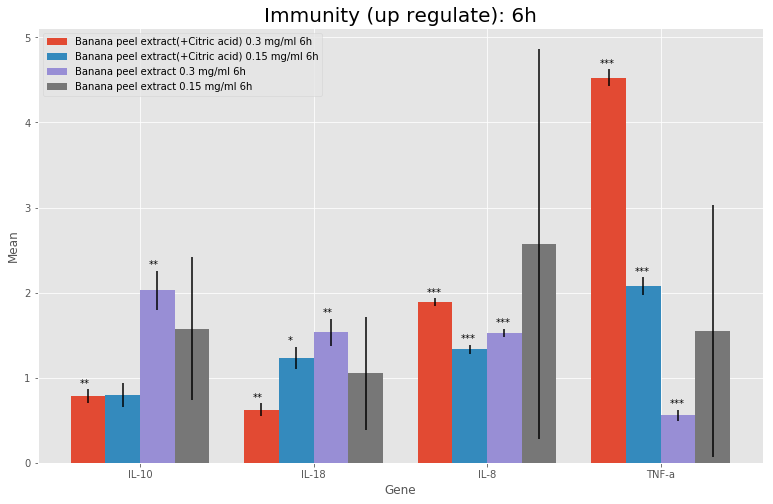

In [169]:
# DataFrame: immunity

num = df_b_select[df_b_select['Category'] == 'immunity'].shape[0]

gene = [df_b_select.iloc[9,1]]*4 + [df_b_select.iloc[10,1]]*4 + [df_b_select.iloc[11,1]]*4 + [df_b_select.iloc[12,1]]*4 + [df_b_select.iloc[13,1]]*4 + [df_b_select.iloc[14,1]]*4
mean = list(df_b_select.iloc[9:15,2:6].stack())
std = list(df_b_select.iloc[9:15,6:10].stack())


p_value = list(df_b_select.iloc[9:15,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Cardiovascular_care = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*6, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Cardiovascular_care = pd.DataFrame(Cardiovascular_care)
Cardiovascular_care = Cardiovascular_care[Cardiovascular_care['Gene'] != 'IL-1B']
Cardiovascular_care = Cardiovascular_care[Cardiovascular_care['Gene'] != 'IL-6']


# Group barplot: immunity

fig = plt.figure(figsize=(13,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.05, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Immunity (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Cardiovascular_care, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/immunity_care_up_6h.png')


In [170]:
df_b_select.iloc[38:40,10:14]

,A1 6h.2,A2 6h.2,B1 6h.2,B2 6h.2


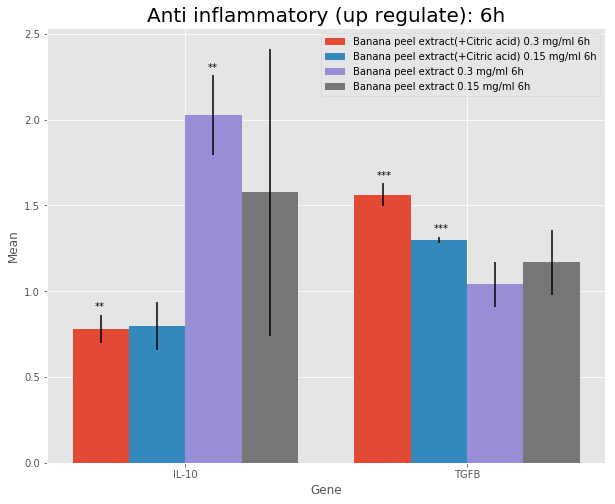

In [171]:
# DataFrame: Anti-inflammatory

num = df_b_select[df_b_select['Category'] == 'Anti-inflammatory'].shape[0]

gene = [df_b_select.iloc[15,1]]*4 + [df_b_select.iloc[16,1]]*4 
mean = list(df_b_select.iloc[15:17,2:6].stack())
std = list(df_b_select.iloc[15:17,6:10].stack())


p_value = list(df_b_select.iloc[15:17,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Anti_inflammatory = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*2, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Anti_inflammatory = pd.DataFrame(Anti_inflammatory)
Anti_inflammatory

# Group barplot: Anti_inflammatory

fig = plt.figure(figsize=(10,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.02, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Anti inflammatory (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "upper right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Anti_inflammatory, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Anti_inflammatory_up_6h.png')


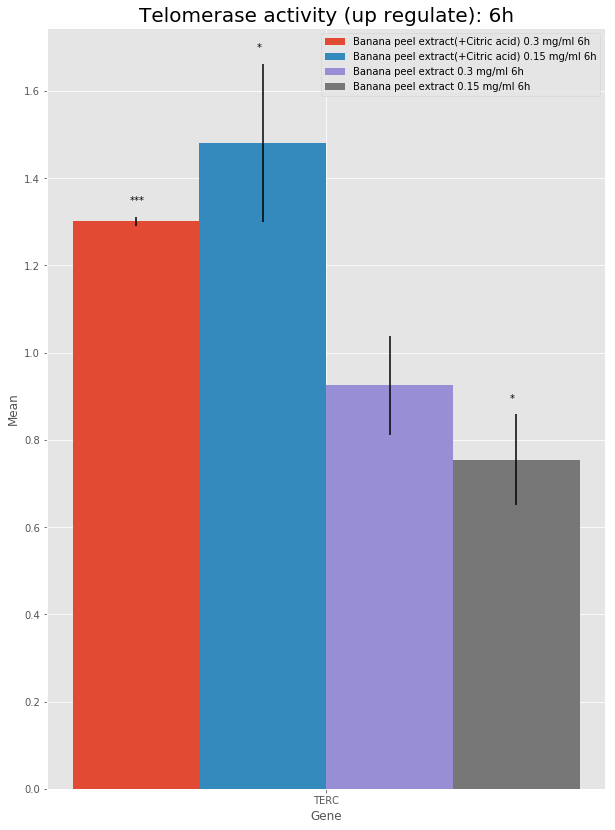

In [172]:
# DataFrame: Telomerase activity

num = df_b_select[df_b_select['Category'] == 'Telomerase activity'].shape[0]

gene = [df_b_select.iloc[17,1]]*4 
mean = list(df_b_select.iloc[17,2:6])
std = list(df_b_select.iloc[17,6:10])

p_value = list(df_b_select.iloc[17,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Nonalcoholic_liver_damage = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Nonalcoholic_liver_damage = pd.DataFrame(Nonalcoholic_liver_damage)
Nonalcoholic_liver_damage 



# Group barplot: Anti-oxidation

fig = plt.figure(figsize=(10,14))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element] - 0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Telomerase activity (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "upper right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Nonalcoholic_liver_damage, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Telomerase_activity_liver_damage_up_6h.png')

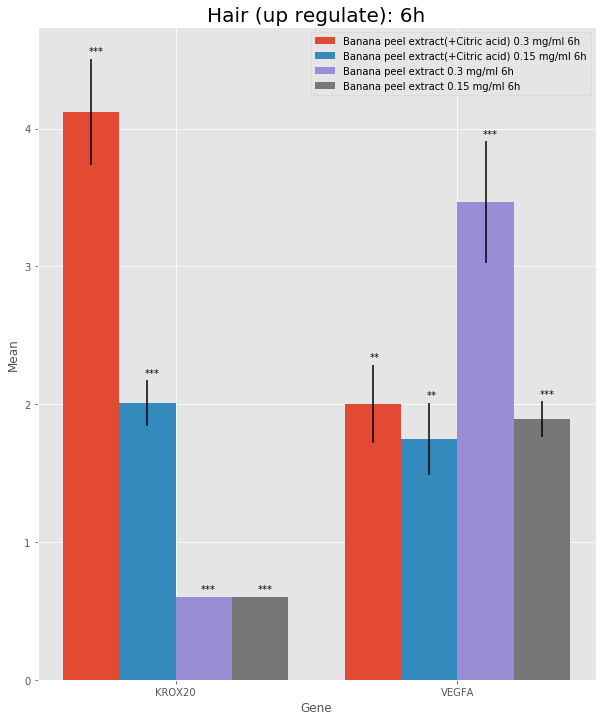

In [173]:
# DataFrame: Hair

num = df_b_select[df_b_select['Category'] == 'Hair'].shape[0]

gene = [df_b_select.iloc[18,1]]*4 + [df_b_select.iloc[19,1]]*4 
mean = list(df_b_select.iloc[18:20,2:6].stack())
std = list(df_b_select.iloc[18:20,6:10].stack())


p_value = list(df_b_select.iloc[18:20,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

hair = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*2, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
hair = pd.DataFrame(hair)
hair 



# Group barplot: Hair

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Hair (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "upper right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(hair, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/hair_up_6h.png')


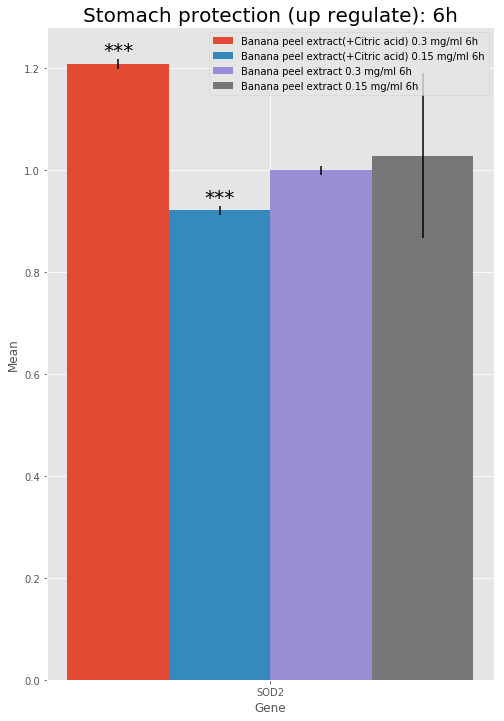

In [174]:
# DataFrame: Stomach protection

num = df_b_select[df_b_select['Category'] == 'Stomach protection'].shape[0]

gene = [df_b_select.iloc[20,1]]*4
mean = list(df_b_select.iloc[20,2:6])
std = list(df_b_select.iloc[20,6:10])


p_value = list(df_b_select.iloc[20,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Stomach_protection = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Stomach_protection = pd.DataFrame(Stomach_protection)
Stomach_protection



# Group barplot: Stomach protection

fig = plt.figure(figsize=(8,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.005), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Stomach protection (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "upper right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Stomach_protection, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Stomach_protection_up_6h.png')


In [175]:
df_b_select.iloc[36:38,10:14]

,A1 6h.2,A2 6h.2,B1 6h.2,B2 6h.2


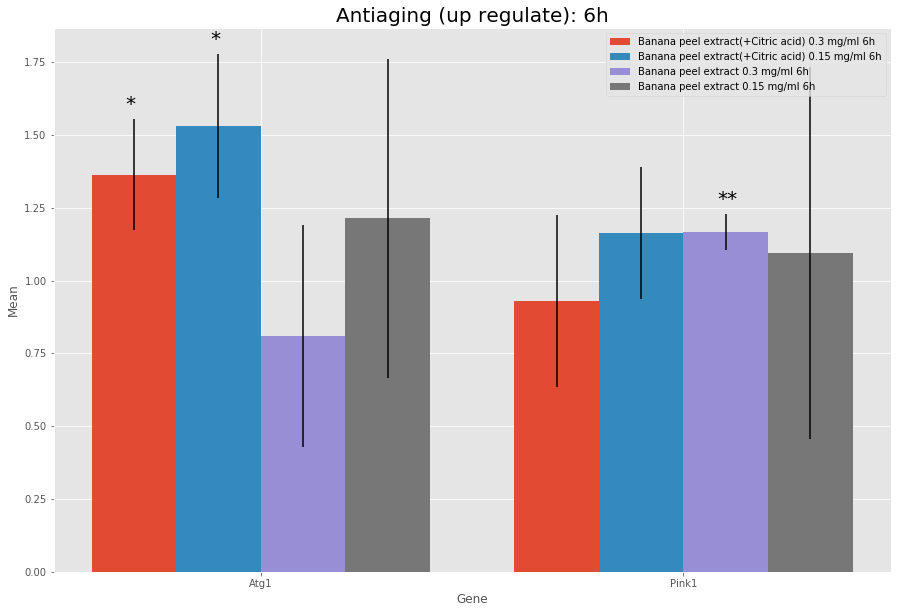

In [176]:
# DataFrame: Antiaging

num = df_b_select[df_b_select['Category'] == 'Antiaging'].shape[0]

gene = [df_b_select.iloc[21,1]]*4 + [df_b_select.iloc[22,1]]*4 
mean = list(df_b_select.iloc[21:23,2:6].stack())
std = list(df_b_select.iloc[21:23,6:10].stack())


p_value = list(df_b_select.iloc[21:23,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

LPS_inflammatory = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*2, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
LPS_inflammatory = pd.DataFrame(LPS_inflammatory)
LPS_inflammatory


# Group barplot: Antiaging

fig = plt.figure(figsize=(15,10))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.02, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Antiaging (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "upper right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(LPS_inflammatory, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Antiaging_up_6h.png')


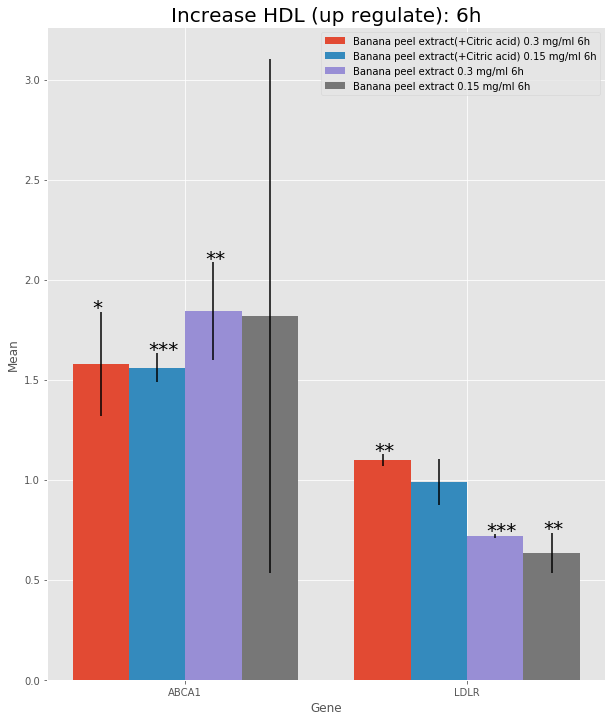

In [177]:
# DataFrame: Increase HDL

num = df_b_select[df_b_select['Category'] == 'Increase HDL'].shape[0]

gene = [df_b_select.iloc[23,1]]*4 + [df_b_select.iloc[24,1]]*4
mean = list(df_b_select.iloc[23:25,2:6].stack())
std = list(df_b_select.iloc[23:25,6:10].stack())

p_value = list(df_b_select.iloc[23:25,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Collagen = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 6h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 6h', 'Banana peel extract 0.3 mg/ml 6h', 'Banana peel extract 0.15 mg/ml 6h']*2, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Collagen = pd.DataFrame(Collagen)
Collagen


# Group barplot: Collagen

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] -0.01), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Increase HDL (up regulate): 6h', fontsize = 20)
    plt.legend(loc = "upper right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Collagen, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Increase_HDL_up_6h.png')


## Part 19: Select 24hr (Gene Mean < 1) & (p-value < 0.05) 

In [59]:
colnames_24hr = ['Category', 'AVG', 'A1 24h', 'A2 24h', 'B1 24h', 'B2 24h', 'A1 24h.1', 'A2 24h.1', 'B1 24h.1', 'B2 24h.1', 'A1 24h.2', 'A2 24h.2', 'B1 24h.2', 'B2 24h.2']
df_s = df.iloc[mean_smaller1,:]
df_s = df_s.loc[:, colnames_24hr]
df_s

# 24hr: mean < 1 & p-vale < 0.05
df_s_select = df_s[((df_s['A1 24h'] < 1) & (df_s['A1 24h.2'] < 0.05)) | ((df_s['A2 24h'] < 1) & (df_s['A2 24h.2'] < 0.05)) | ((df_s['B1 24h'] < 1) & (df_s['B1 24h.2'] < 0.05)) | ((df_s['B2 24h'] < 1) & (df_s['B2 24h.2'] < 0.05))]
df_s_select

,Category,AVG,A1 24h,A2 24h,B1 24h,B2 24h,A1 24h.1,A2 24h.1,B1 24h.1,B2 24h.1,A1 24h.2,A2 24h.2,B1 24h.2,B2 24h.2
33,Whitening,MITF,0.131930,0.179191,0.470701,0.444865,0.009262,0.009713,0.030770,0.293504,8.638981e-09,1.306764e-08,0.000008,0.030615
36,allergy,ABR,0.596665,0.648157,1.306066,0.992422,0.008483,0.006481,0.123341,0.028468,1.303351e-07,7.669470e-08,0.012666,0.668726
37,allergy,CD40,0.654796,0.734532,0.842644,0.687300,0.026555,0.047177,0.044660,0.124990,2.304086e-05,6.207225e-04,0.003648,0.012318
38,allergy,DYNLL2,0.753773,0.834483,0.756219,0.842366,0.041310,0.092884,0.049533,0.061506,4.967042e-04,3.670021e-02,0.001039,0.011342
42,allergy,IL4R,1.367224,1.052764,0.880489,0.475725,0.133195,0.027284,0.124808,0.246540,8.805580e-03,2.858084e-02,0.172547,0.021143
46,allergy,NCK1,0.467452,0.561910,0.862606,0.776735,0.038233,0.091656,0.123659,0.530397,1.750871e-05,1.161970e-03,0.126623,0.506344
48,allergy,PSMD4,0.941158,0.977613,1.054992,1.152714,0.021717,0.033472,0.020266,0.165696,9.356841e-03,3.111431e-01,0.009309,0.185646
50,allergy,RELA,1.242318,1.146869,0.841385,0.738079,0.081260,0.120789,0.059095,0.270946,6.674955e-03,1.029509e-01,0.009669,0.169372
54,Eye protection,CASP3,0.879538,0.895794,0.836710,1.145492,0.044602,0.024403,0.075623,0.216073,9.462365e-03,1.782341e-03,0.020122,0.308299
55,Eye protection,CASP8,0.630056,0.681570,0.811661,0.699405,0.012097,0.035651,0.031276,0.550415,7.603564e-07,1.018886e-04,0.000477,0.397753


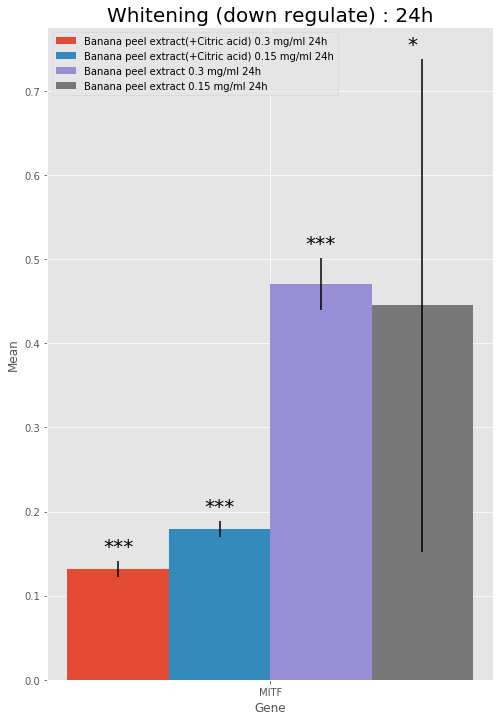

In [61]:
# DataFrame: Whitening

num = df_s_select[df_s_select['Category'] == 'Whitening	'].shape[0]

gene = [df_s_select.iloc[0,1]]*4 
mean = list(df_s_select.iloc[0,2:6])
std = list(df_s_select.iloc[0,6:10])

p_value = list(df_s_select.iloc[0,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Whitening = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Whitening = pd.DataFrame(Whitening)
Whitening


# Group barplot: Stomach protection

fig = plt.figure(figsize=(8,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.01), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Whitening (down regulate) : 24h', fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Whitening, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Whitening_down_24h.png')

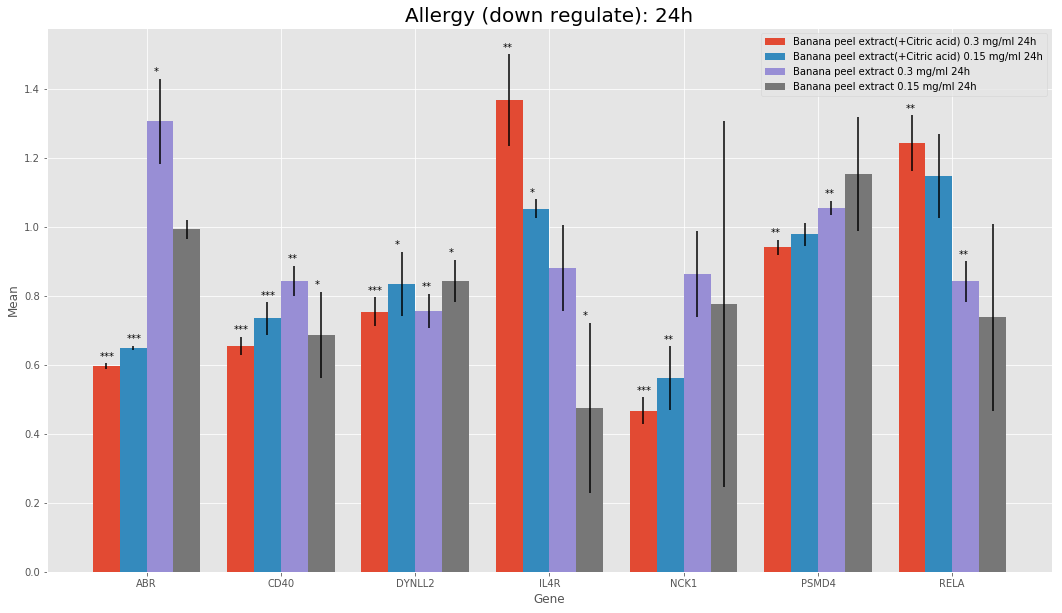

In [63]:
# DataFrame: allergy

num = df_s_select[df_s_select['Category'] == 'allergy'].shape[0]

gene = [df_s_select.iloc[1,1]]*4 + [df_s_select.iloc[2,1]]*4 + [df_s_select.iloc[3,1]]*4 + [df_s_select.iloc[4,1]]*4 + [df_s_select.iloc[5,1]]*4 + [df_s_select.iloc[6,1]]*4 + [df_s_select.iloc[7,1]]*4 

mean = list(df_s_select.iloc[1:8,2:6].stack())
std = list(df_s_select.iloc[1:8,6:10].stack())

p_value = list(df_s_select.iloc[1:8,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

allergy = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*7, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
allergy = pd.DataFrame(allergy)
allergy



# Group barplot: allergy

fig = plt.figure(figsize=(18,10))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.05, ((dfg[val].values)[element] + dfg[err].values)[element] +0.01))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Allergy (down regulate): 24h', fontsize = 20)
    plt.legend()
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(allergy, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/allergy_down_24h.png')

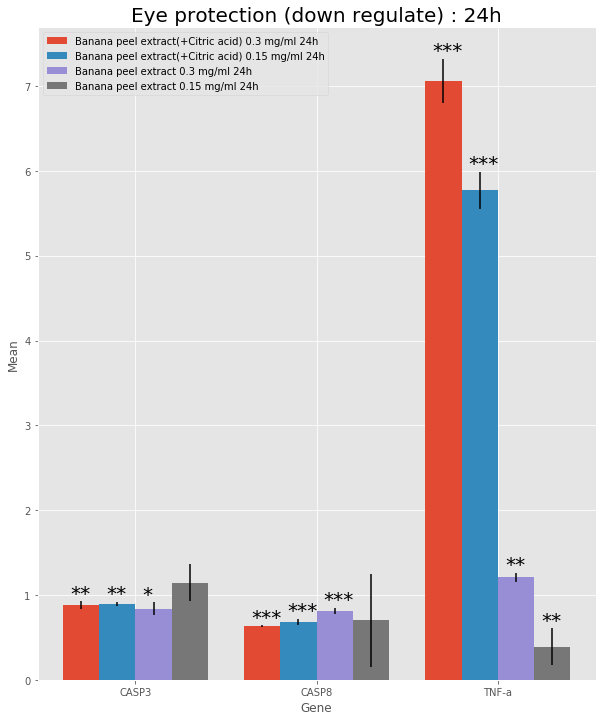

In [64]:
# DataFrame: Eye protection

num = df_s_select[df_s_select['Category'] == 'Eye protection'].shape[0]

gene = [df_s_select.iloc[8,1]]*4 + [df_s_select.iloc[9,1]]*4 + [df_s_select.iloc[10,1]]*4

mean = list(df_s_select.iloc[8:11,2:6].stack())
std = list(df_s_select.iloc[8:11,6:10].stack())

p_value = list(df_s_select.iloc[8:11,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

eye_protection = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*3, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
eye_protection = pd.DataFrame(eye_protection)
#eye_protection = eye_protection.iloc[0:8, :]
eye_protection


# Group barplot: Eye protection

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.06, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Eye protection (down regulate) : 24h', fontsize = 20)
    plt.legend()
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

grouped_barplot(eye_protection, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/eye_protection_down_24h.png')

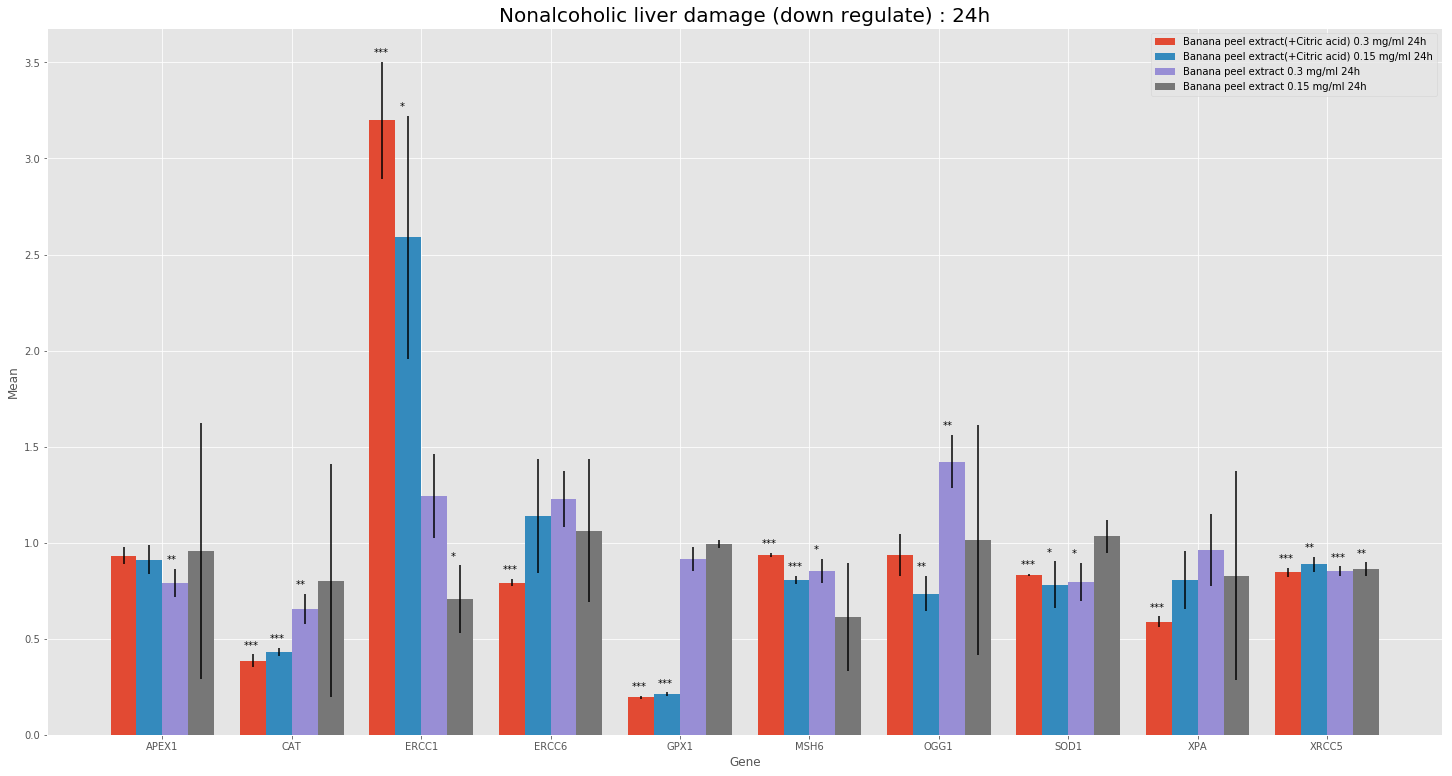

In [65]:
# DataFrame: Nonalcoholic liver damage

num = df_s_select[df_s_select['Category'] == 'Nonalcoholic liver damage'].shape[0]

gene = [df_s_select.iloc[11,1]]*4 + [df_s_select.iloc[12,1]]*4 + [df_s_select.iloc[13,1]]*4 + [df_s_select.iloc[14,1]]*4 + [df_s_select.iloc[15,1]]*4 + [df_s_select.iloc[16,1]]*4 + [df_s_select.iloc[17,1]]*4 + [df_s_select.iloc[18,1]]*4 + [df_s_select.iloc[19,1]]*4 + [df_s_select.iloc[20,1]]*4

mean = list(df_s_select.iloc[11:21,2:6].stack())
std = list(df_s_select.iloc[11:21,6:10].stack())

p_value = list(df_s_select.iloc[11:21,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Nonalcoholic_liver_damage = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*10, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Nonalcoholic_liver_damage = pd.DataFrame(Nonalcoholic_liver_damage)
Nonalcoholic_liver_damage



# Group barplot: Nonalcoholic liver damage

fig = plt.figure(figsize=(25,13))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.07, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Nonalcoholic liver damage (down regulate) : 24h', fontsize = 20)
    plt.legend()
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Nonalcoholic_liver_damage, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Nonalcoholic_liver_damage_down_24h.png')

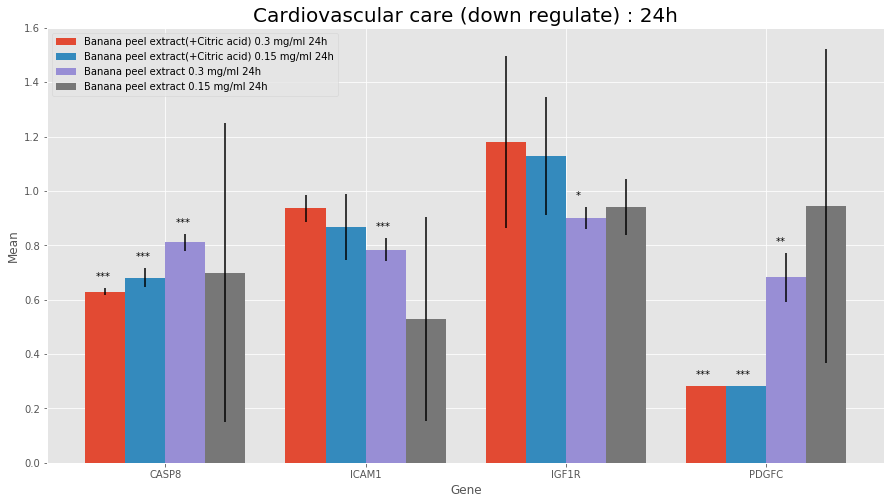

In [66]:
# DataFrame: Cardiovascular care

num = df_s_select[df_s_select['Category'] == 'Cardiovascular care'].shape[0]

gene = [df_s_select.iloc[21,1]]*4 + [df_s_select.iloc[22,1]]*4 + [df_s_select.iloc[23,1]]*4 + [df_s_select.iloc[24,1]]*4 
mean = list(df_s_select.iloc[21:25,2:6].stack())
std = list(df_s_select.iloc[21:25,6:10].stack())

p_value = list(df_s_select.iloc[21:25,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Cardiovascular_care = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*4, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Cardiovascular_care = pd.DataFrame(Cardiovascular_care)
Cardiovascular_care



# Group barplot: Cardiovascular care

fig = plt.figure(figsize=(15,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.05, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Cardiovascular care (down regulate) : 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Cardiovascular_care, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Cardiovascular_care_down_24h.png')

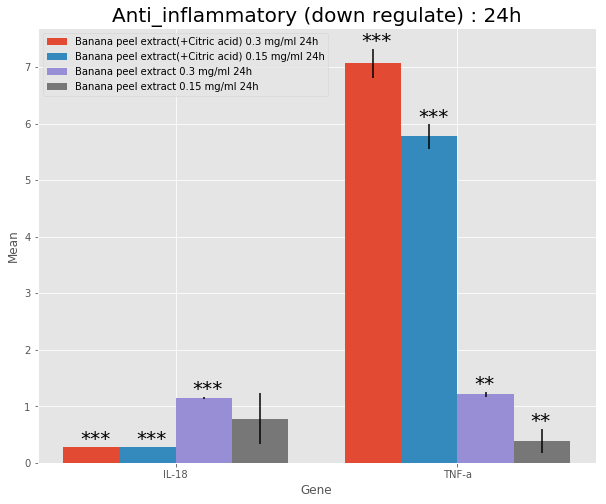

In [67]:
# DataFrame: Anti-inflammatory

num = df_s_select[df_s_select['Category'] == 'Anti-inflammatory'].shape[0]

gene = [df_s_select.iloc[25,1]]*4 + [df_s_select.iloc[26,1]]*4
mean = list(df_s_select.iloc[25:27,2:6].stack())
std = list(df_s_select.iloc[25:27,6:10].stack())

p_value = list(df_s_select.iloc[25:27,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Anti_inflammatory = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*2, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Anti_inflammatory = pd.DataFrame(Anti_inflammatory)
#Anti_inflammatory = Anti_inflammatory.iloc[0:4,:]


# Group barplot: Anti-inflammatory

fig = plt.figure(figsize=(10,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.04, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Anti_inflammatory (down regulate) : 24h', fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Anti_inflammatory, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Anti_inflammatory_down_24h.png')

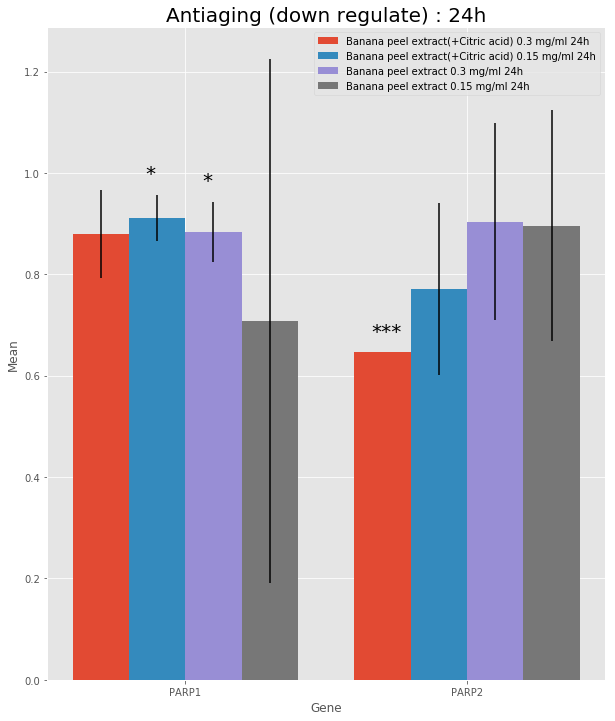

In [69]:
# DataFrame: Antiaging

num = df_s_select[df_s_select['Category'] == 'Antiaging'].shape[0]

gene = [df_s_select.iloc[27,1]]*4 + [df_s_select.iloc[28,1]]*4
mean = list(df_s_select.iloc[27:29,2:6].stack())
std = list(df_s_select.iloc[27:29,6:10].stack())

p_value = list(df_s_select.iloc[27:29,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Antiaging = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*2, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Antiaging = pd.DataFrame(Antiaging)
Antiaging

# Group barplot: Antiaging

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.04, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Antiaging (down regulate) : 24h', fontsize = 20)
    plt.legend(loc='upper right')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Antiaging, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Antiaging_down_24h.png')

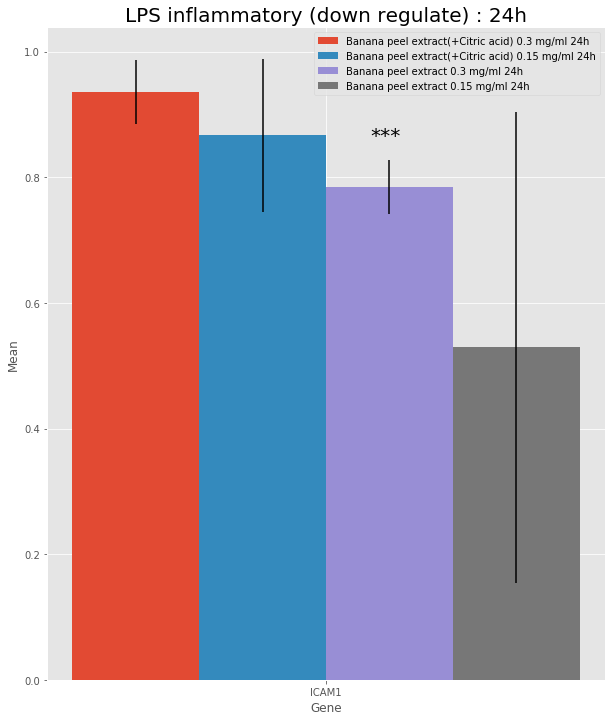

In [70]:
# DataFrame: LPS inflammatory

num = df_s_select[df_s_select['Category'] == 'LPS inflammatory'].shape[0]

gene = [df_s_select.iloc[29,1]]*4 
mean = list(df_s_select.iloc[29,2:6])
std = list(df_s_select.iloc[29,6:10])

p_value = list(df_s_select.iloc[29,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

LPS_inflammatory = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
LPS_inflammatory = pd.DataFrame(LPS_inflammatory)
LPS_inflammatory


# Group barplot: LPS_inflammatory

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('LPS inflammatory (down regulate) : 24h', fontsize = 20)
    plt.legend(loc='upper right')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(LPS_inflammatory, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/LPS_inflammatory_down_24h.png')

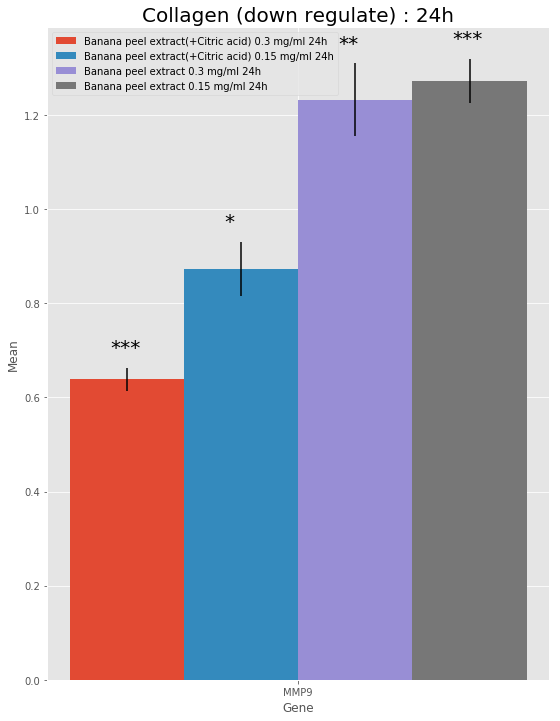

In [71]:
# DataFrame: Collagen

num = df_s_select[df_s_select['Category'] == 'Collagen'].shape[0]

gene = [df_s_select.iloc[30,1]]*4 
mean = list(df_s_select.iloc[30,2:6])
std = list(df_s_select.iloc[30,6:10])

p_value = list(df_s_select.iloc[30,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Collagen = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Collagen = pd.DataFrame(Collagen)
Collagen

# Group barplot: Collagen

fig = plt.figure(figsize=(9,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Collagen (down regulate) : 24h', fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Collagen, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Collagen_down_24h.png')



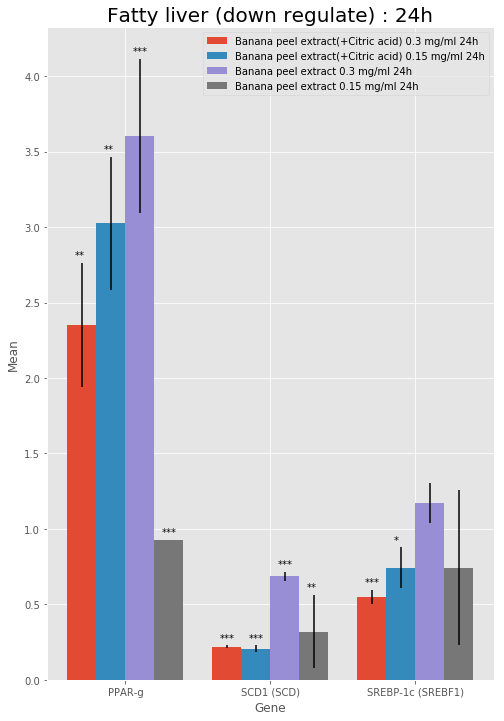

In [72]:
# DataFrame: Fatty liver

num = df_s_select[df_s_select['Category'] == 'Fatty liver'].shape[0]

gene = [df_s_select.iloc[31,1]]*4 + [df_s_select.iloc[32,1]]*4 + [df_s_select.iloc[33,1]]*4
mean = list(df_s_select.iloc[31:34,2:6].stack())
std = list(df_s_select.iloc[31:34,6:10].stack())

p_value = list(df_s_select.iloc[31:34,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Fatty_liver = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*3, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Fatty_liver = pd.DataFrame(Fatty_liver)
Fatty_liver


# Group barplot: Fatty_liver

fig = plt.figure(figsize=(8,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.05, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Fatty liver (down regulate) : 24h', fontsize = 20)
    plt.legend(loc='upper right')
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Fatty_liver, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Fatty_liver_down_24h.png')

## Part 20: Select 24hr (Gene Mean > 1) & (p-value < 0.05) 

In [73]:
colnames_24hr = ['Category', 'AVG', 'A1 24h', 'A2 24h', 'B1 24h', 'B2 24h', 'A1 24h.1', 'A2 24h.1', 'B1 24h.1', 'B2 24h.1', 'A1 24h.2', 'A2 24h.2', 'B1 24h.2', 'B2 24h.2']
df_b = df.iloc[mean_bigger1,:]
df_b = df_b.loc[:, colnames_24hr]
df_b

# 24hr: mean < 1 & p-vale < 0.05
df_b_select = df_b[((df_b['A1 24h'] > 1) & (df_b['A1 24h.2'] < 0.05)) | ((df_b['A2 24h'] > 1) & (df_b['A2 24h.2'] < 0.05)) | ((df_b['B1 24h'] > 1) & (df_b['B1 24h.2'] < 0.05)) | ((df_b['B2 24h'] > 1) & (df_b['B2 24h.2'] < 0.05))]
df_b_select


,Category,AVG,A1 24h,A2 24h,B1 24h,B2 24h,A1 24h.1,A2 24h.1,B1 24h.1,B2 24h.1,A1 24h.2,A2 24h.2,B1 24h.2,B2 24h.2
1,DNA repair,ERCC1,3.197774,2.589325,1.241763,0.706946,0.305684,0.631350,0.218841,0.174656,2.391230e-04,1.206057e-02,1.282315e-01,0.043845
4,DNA repair,MPG,1.315449,0.990376,1.233095,1.185488,0.072504,0.093750,0.157439,0.584751,1.660775e-03,8.675224e-01,6.234860e-02,0.611949
7,DNA repair,OGG1,0.937937,0.734132,1.422028,1.015285,0.109509,0.092228,0.138716,0.598302,3.818629e-01,7.527444e-03,6.214003e-03,0.966826
8,DNA repair,UNG,1.279974,1.431694,1.951463,1.276438,0.308378,0.422325,0.500957,0.540605,1.909347e-01,1.513559e-01,3.022501e-02,0.425822
14,Circadian rhythm,CRY,1.137664,1.129229,1.217933,0.971165,0.057276,0.103421,0.068541,0.608352,1.411106e-02,9.642643e-02,5.302963e-03,0.938514
31,Anti-oxidation,SOD2,1.063710,0.981973,1.119306,0.867885,0.026997,0.059994,0.081212,0.116937,1.500641e-02,6.302245e-01,6.367604e-02,0.121993
93,immunity,IL-10,4.271415,3.326414,0.762586,1.248151,0.293647,0.149157,0.069849,0.466702,4.251386e-05,1.116306e-05,4.161801e-03,0.409193
94,immunity,IL-18,0.282393,0.282393,1.148774,0.783358,0.000000,0.000000,0.022714,0.444964,0.000000e+00,0.000000e+00,3.442094e-04,0.446541
95,immunity,IL-1B,64.642011,62.926155,4.598424,1.798693,1.965534,1.920922,0.167245,0.351244,6.052509e-07,6.159189e-07,3.095921e-06,0.016981
96,immunity,IL-6,189.504397,175.598932,2.452575,1.424152,10.770569,11.236485,0.274332,0.417429,7.053965e-06,1.133125e-05,7.848693e-04,0.153226


In [190]:
df_b_select.iloc[0:12,10:14]

,A1 24h.2,A2 24h.2,B1 24h.2,B2 24h.2
1,2.391230e-04,1.206057e-02,1.282315e-01,0.043845
4,1.660775e-03,8.675224e-01,6.234860e-02,0.611949
7,3.818629e-01,7.527444e-03,6.214003e-03,0.966826
8,1.909347e-01,1.513559e-01,3.022501e-02,0.425822
14,1.411106e-02,9.642643e-02,5.302963e-03,0.938514
31,1.500641e-02,6.302245e-01,6.367604e-02,0.121993
93,4.251386e-05,1.116306e-05,4.161801e-03,0.409193
94,0.000000e+00,0.000000e+00,3.442094e-04,0.446541
95,6.052509e-07,6.159189e-07,3.095921e-06,0.016981
96,7.053965e-06,1.133125e-05,7.848693e-04,0.153226


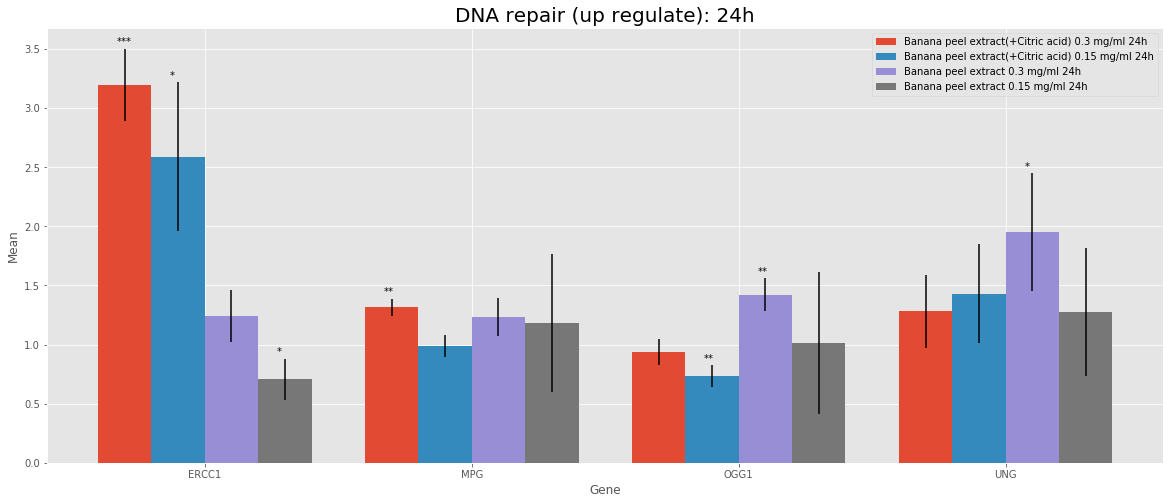

In [74]:
# DataFrame: DNA repair

num = df_b_select[df_b_select['Category'] == 'DNA repair'].shape[0]

gene = [df_b_select.iloc[0,1]]*4 + [df_b_select.iloc[1,1]]*4 + [df_b_select.iloc[2,1]]*4 + [df_b_select.iloc[3,1]]*4       

mean = list(df_b_select.iloc[0:4,2:6].stack())
std = list(df_b_select.iloc[0:4,6:10].stack())

p_value = list(df_b_select.iloc[0:4,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

allergy = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*4, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
allergy = pd.DataFrame(allergy)
allergy


# Group barplot: allergy

fig = plt.figure(figsize=(20,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('DNA repair (up regulate): 24h', fontsize = 20)
    plt.legend()
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(allergy, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/DNA_repair_up_24h.png')

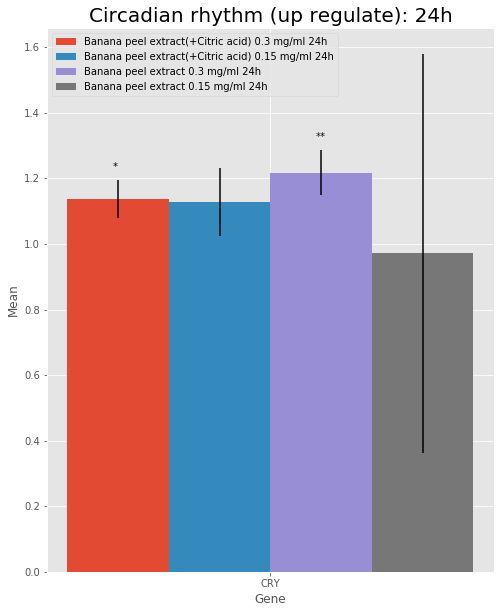

In [75]:
# DataFrame: Circadian rhythm

num = df_b_select[df_b_select['Category'] == 'Circadian rhythm'].shape[0]

gene = [df_b_select.iloc[4,1]]*4 
mean = list(df_b_select.iloc[4,2:6])
std = list(df_b_select.iloc[4,6:10])

p_value = list(df_b_select.iloc[4,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

eye_protection = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
eye_protection = pd.DataFrame(eye_protection)
eye_protection
#eye_protection = eye_protection.iloc[4:, :]


# Group barplot: eye_protection

fig = plt.figure(figsize=(8,10))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Circadian rhythm (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(eye_protection, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Circadian_rhythm_up_24h.png')

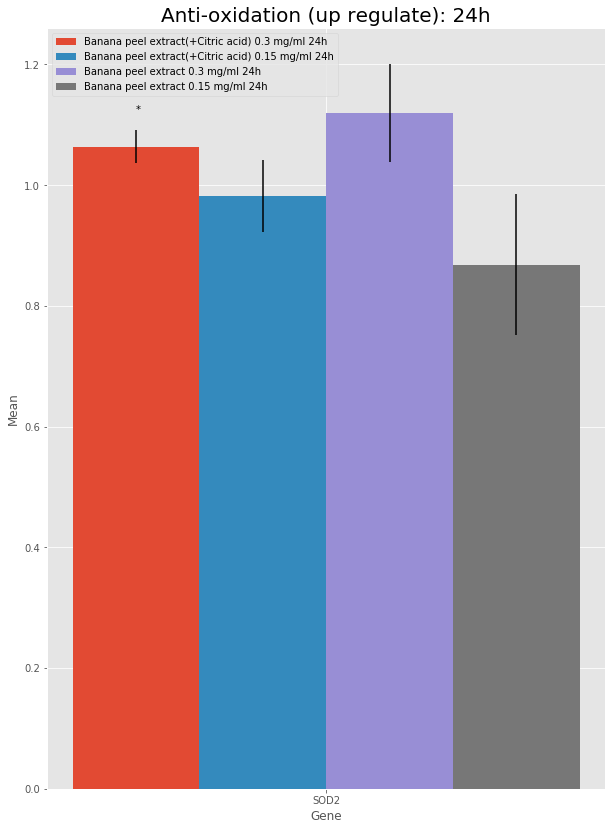

In [76]:
# DataFrame: Anti-oxidation

num = df_b_select[df_b_select['Category'] == 'Anti-oxidation'].shape[0]

gene = [df_b_select.iloc[5,1]]*4 
mean = list(df_b_select.iloc[5,2:6])
std = list(df_b_select.iloc[5,6:10])

p_value = list(df_b_select.iloc[5,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Nonalcoholic_liver_damage = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Nonalcoholic_liver_damage = pd.DataFrame(Nonalcoholic_liver_damage)
Nonalcoholic_liver_damage 



# Group barplot: Anti-oxidation

fig = plt.figure(figsize=(10,14))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element], ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Anti-oxidation (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Nonalcoholic_liver_damage, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Anti-oxidation_liver_damage_up_24h.png')

In [194]:
df_b_select.iloc[21,12:14] = 0
df_b_select.iloc[22, 13] = 0
df_b_select.iloc[21:26,10:14]

,A1 24h.2,A2 24h.2,B1 24h.2,B2 24h.2
175,0.000067,0.001891,0.00000,0.0
177,0.894875,0.077307,0.00009,0.0


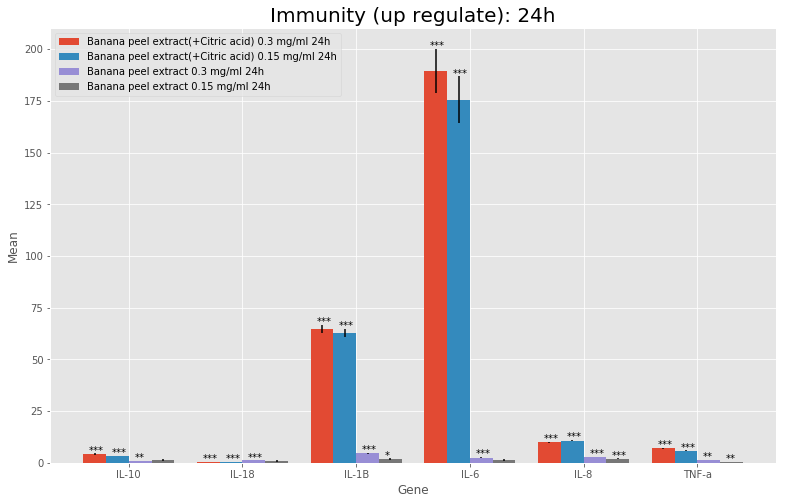

In [77]:
# DataFrame: immunity

num = df_b_select[df_b_select['Category'] == 'immunity'].shape[0]

gene = [df_b_select.iloc[6,1]]*4 + [df_b_select.iloc[7,1]]*4 + [df_b_select.iloc[8,1]]*4 + [df_b_select.iloc[9,1]]*4 + [df_b_select.iloc[10,1]]*4 + [df_b_select.iloc[11,1]]*4
mean = list(df_b_select.iloc[6:12,2:6].stack())
std = list(df_b_select.iloc[6:12,6:10].stack())


p_value = list(df_b_select.iloc[6:12,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Cardiovascular_care = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*6, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Cardiovascular_care = pd.DataFrame(Cardiovascular_care)
Cardiovascular_care

# Group barplot: immunity

fig = plt.figure(figsize=(13,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.05, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Immunity (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Cardiovascular_care, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/immunity_care_up_24h.png')


In [196]:
df_b_select.iloc[26:34,10:14]

,A1 24h.2,A2 24h.2,B1 24h.2,B2 24h.2


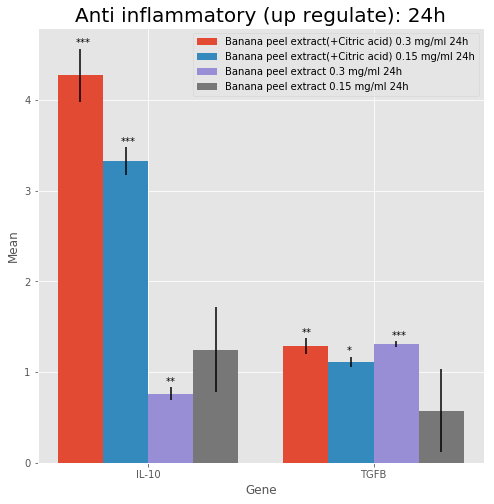

In [78]:
# DataFrame: Anti-inflammatory

num = df_b_select[df_b_select['Category'] == 'Anti-inflammatory'].shape[0]

gene = [df_b_select.iloc[12,1]]*4 + [df_b_select.iloc[13,1]]*4 
mean = list(df_b_select.iloc[12:14,2:6].stack())
std = list(df_b_select.iloc[12:14,6:10].stack())


p_value = list(df_b_select.iloc[12:14,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Anti_inflammatory = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*2, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Anti_inflammatory = pd.DataFrame(Anti_inflammatory)
Anti_inflammatory

# Group barplot: Anti_inflammatory

fig = plt.figure(figsize=(8,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.02, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Anti inflammatory (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Anti_inflammatory, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Anti_inflammatory_up_24h.png')


In [198]:
df_b_select.iloc[34:36,10:14]
p_value

[4.251385790823874e-05,
 1.116305549093656e-05,
 0.00416180135859964,
 0.40919329232444174,
 0.004127710990200433,
 0.022995277115312462,
 6.693561806341797e-05,
 0.1845571415696058]

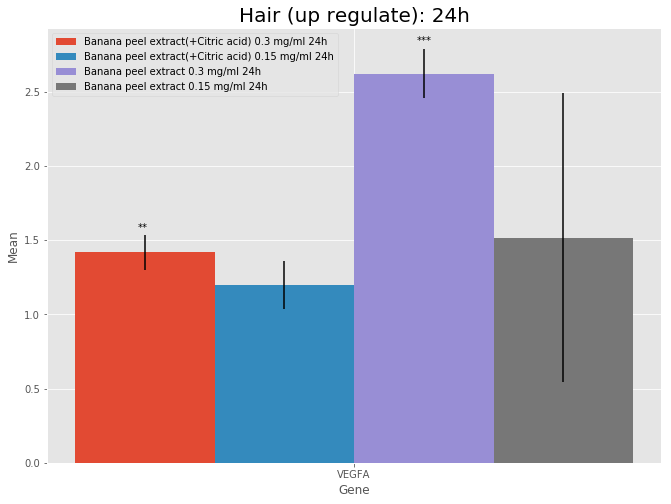

In [79]:
# DataFrame: Hair

num = df_b_select[df_b_select['Category'] == 'Hair'].shape[0]

gene = [df_b_select.iloc[14,1]]*4 
mean = list(df_b_select.iloc[14,2:6])
std = list(df_b_select.iloc[14,6:10])


p_value = list(df_b_select.iloc[14,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

hair = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
hair = pd.DataFrame(hair)
hair 



# Group barplot: Hair

fig = plt.figure(figsize=(11,8))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03))
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Hair (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(hair, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/hair_up_24h.png')


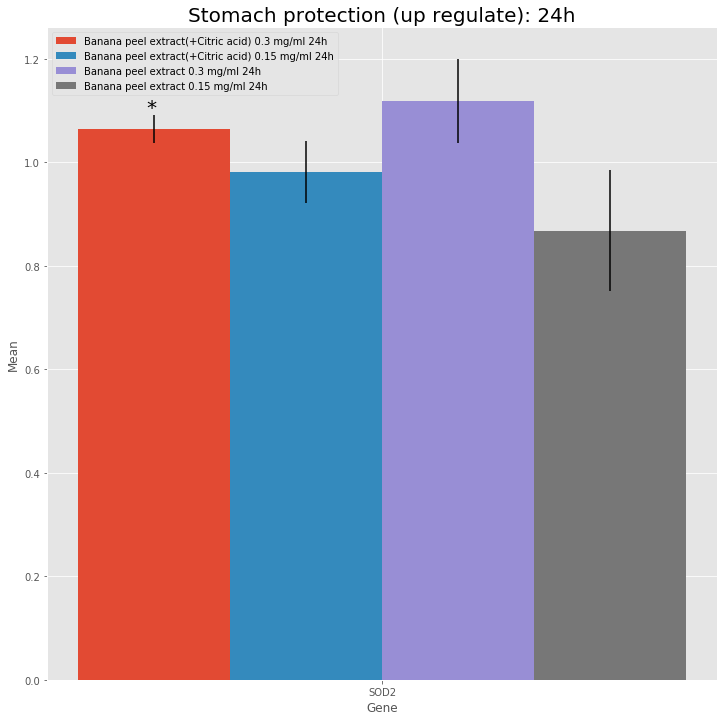

In [80]:
# DataFrame: Stomach protection

num = df_b_select[df_b_select['Category'] == 'Stomach protection'].shape[0]

gene = [df_b_select.iloc[15,1]]*4
mean = list(df_b_select.iloc[15,2:6])
std = list(df_b_select.iloc[15,6:10])


p_value = list(df_b_select.iloc[15,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Stomach_protection = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Stomach_protection = pd.DataFrame(Stomach_protection)
Stomach_protection



# Group barplot: Stomach protection

fig = plt.figure(figsize=(12,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.005), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Stomach protection (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Stomach_protection, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Stomach_protection_up_24h.png')


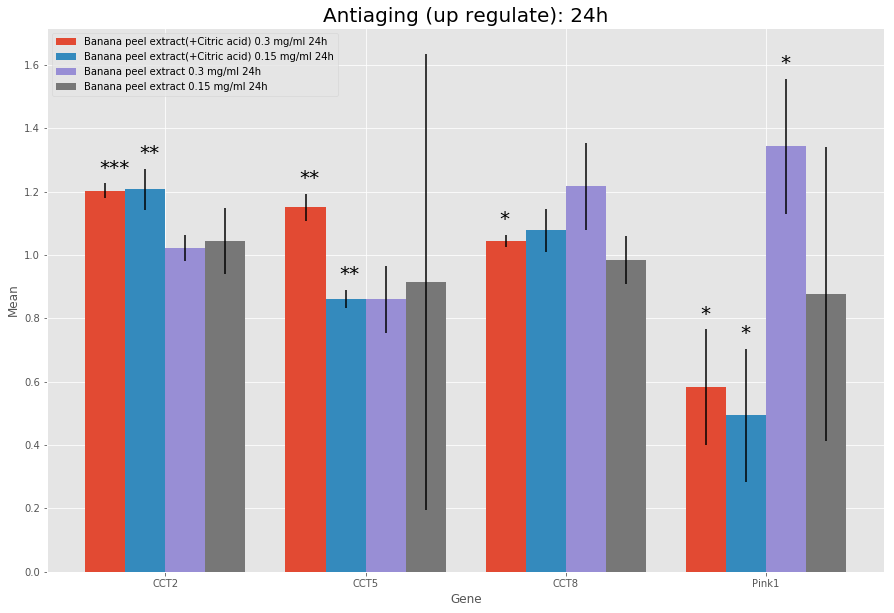

In [81]:
# DataFrame: Antiaging

num = df_b_select[df_b_select['Category'] == 'Antiaging'].shape[0]

gene = [df_b_select.iloc[16,1]]*4 + [df_b_select.iloc[17,1]]*4 + [df_b_select.iloc[18,1]]*4 + [df_b_select.iloc[19,1]]*4
mean = list(df_b_select.iloc[16:20,2:6].stack())
std = list(df_b_select.iloc[16:20,6:10].stack())


p_value = list(df_b_select.iloc[16:20,10:14].stack())
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

LPS_inflammatory = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*4, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
LPS_inflammatory = pd.DataFrame(LPS_inflammatory)
LPS_inflammatory


# Group barplot: Antiaging

fig = plt.figure(figsize=(15,10))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.03, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Antiaging (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(LPS_inflammatory, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Antiaging_up_24h.png')


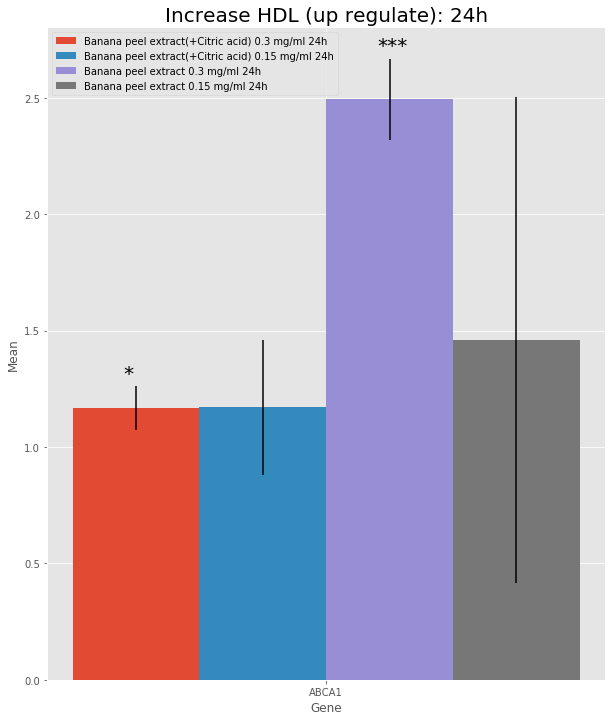

In [82]:
# DataFrame: Increase HDL

num = df_b_select[df_b_select['Category'] == 'Increase HDL'].shape[0]

gene = [df_b_select.iloc[20,1]]*4 
mean = list(df_b_select.iloc[20,2:6])
std = list(df_b_select.iloc[20,6:10])

p_value = list(df_b_select.iloc[20,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Collagen = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Collagen = pd.DataFrame(Collagen)
Collagen


# Group barplot: Collagen

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.02, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Increase HDL (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Collagen, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Increase_HDL_up_24h.png')


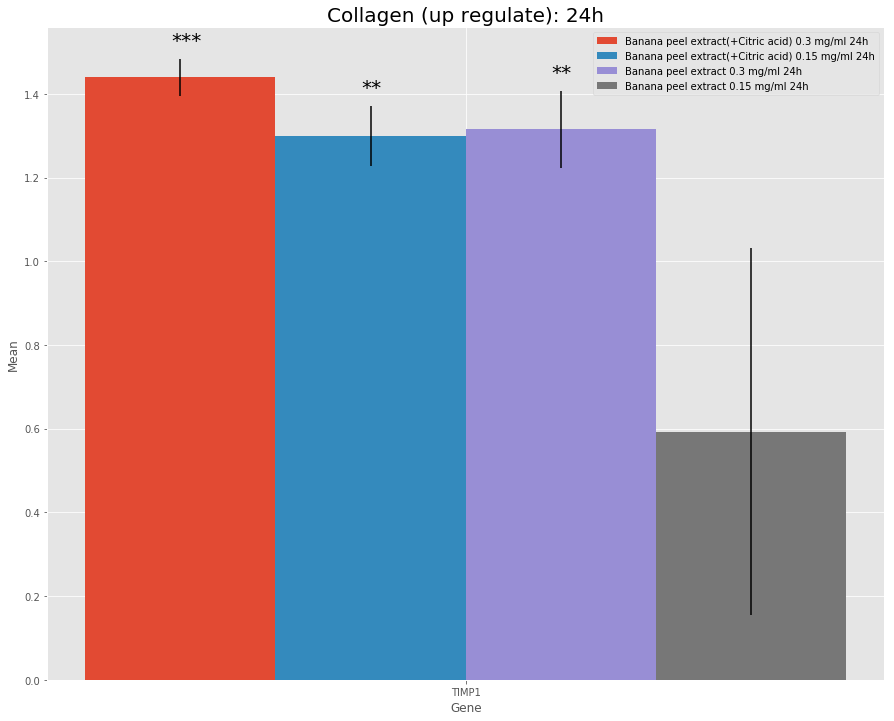

In [83]:
# DataFrame: Collagen

num = df_b_select[df_b_select['Category'] == 'Collagen'].shape[0]

gene = [df_b_select.iloc[21,1]]*4 
mean = list(df_b_select.iloc[21,2:6])
std = list(df_b_select.iloc[21,6:10])

p_value = list(df_b_select.iloc[21,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Collagen = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Collagen = pd.DataFrame(Collagen)
Collagen


# Group barplot: Collagen

fig = plt.figure(figsize=(15,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.01, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Collagen (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper right")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Collagen, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Collagen_up_24h.png')


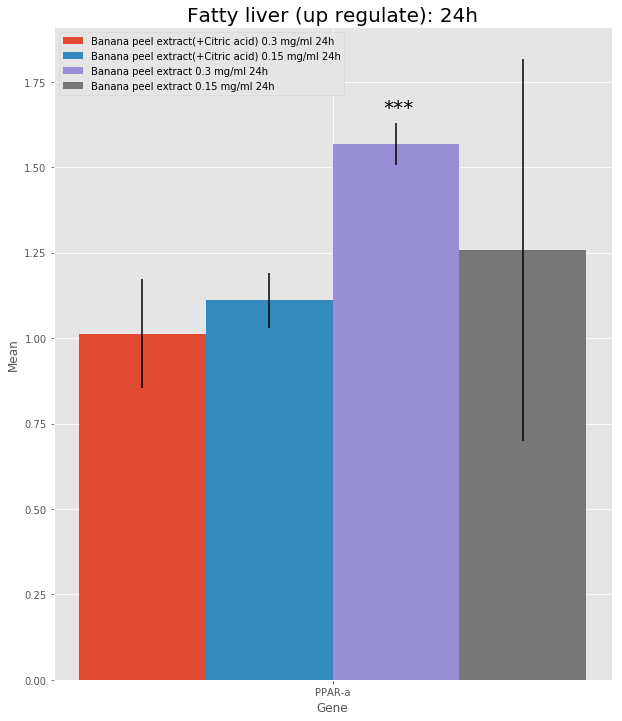

In [84]:
# DataFrame: Fatty liver

num = df_b_select[df_b_select['Category'] == 'Fatty liver'].shape[0]

gene = [df_b_select.iloc[22,1]]*4
mean = list(df_b_select.iloc[22,2:6])
std = list(df_b_select.iloc[22,6:10])

p_value = list(df_b_select.iloc[22,10:14])
p_value


sign = []

for num in p_value:
    
    if num < 0.001:
        significant = "***"
        
    elif num < 0.01:
        significant = "**"
        
    elif num < 0.05:
        significant = "*"
    else:
        significant = ""
        
    sign.append(significant)
    

Fatty_liver = {'Gene':gene, 'Set':['Banana peel extract(+Citric acid) 0.3 mg/ml 24h', 'Banana peel extract(+Citric acid) 0.15 mg/ml 24h', 'Banana peel extract 0.3 mg/ml 24h', 'Banana peel extract 0.15 mg/ml 24h']*1, 'Mean': mean, 'Std': std, 'p-value': p_value, 'significant': sign}
Fatty_liver = pd.DataFrame(Fatty_liver)
Fatty_liver


# Group barplot: Fatty liver

fig = plt.figure(figsize=(10,12))

def grouped_barplot(df, cat,subcat, val , err, sign):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format(gr), yerr=dfg[err].values)
        
        for element in range(len(x)):
            plt.annotate(dfg[sign].values[element] ,((x+offsets[i])[element]-0.02, ((dfg[val].values)[element] + dfg[err].values)[element] +0.03), fontsize = 20)
    
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.title('Fatty liver (up regulate): 24h', fontsize = 20)
    plt.legend(loc = "upper left")
    plt.show()

cat = "Gene"
subcat = "Set"
val = "Mean"
err = "Std"
sign = 'significant'

a = grouped_barplot(Fatty_liver, cat, subcat, val, err, sign)
fig.savefig('../data/191021/result/Fatty_liver_up_24h.png')

## Part 17: Get the mean, std, p-value of specific genetic group (Optional)

In [54]:
#單組基因群 才按這格
# Get the mean of G2
DNA_repair_mean = []
for i in range(len(G2)):
    DNA_repair_mean.append(df1_mean.loc[G2[i]])
    
    
df_mean = pd.DataFrame(DNA_repair_mean)
df_mean.to_csv("antiaging_mean.csv")

In [55]:
#單組基因群 才按這格
# Get the std of G14
DNA_repair_std = []
for i in range(len(G2)):
    DNA_repair_std.append(df1_std.loc[G2[i]])
    
    
df_std = pd.DataFrame(DNA_repair_std)
df_std.to_csv("antiaging_std.csv")

In [56]:
#單組基因群 才按這格
# Get the p-value of G14
DNA_repair_p = []
for i in range(len(G2)):
    DNA_repair_p.append(df1_p.loc[G2[i]])
    
    
df_p = pd.DataFrame(DNA_repair_p)
df_p.to_csv("antiaging_p.csv")

In [57]:
#target_group=[G2]

#from matplotlib.font_manager import FontProperties # 步驟一
#font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20) # 步驟二

#n=0
#while n < len(target_group):
#    G_Name=target_group[n]
#    for i in range(len(G_Name)):
#        if i == 0:
#            plot_df=df1_mean.loc[G_Name[i]]
#            std_df=df1_std.loc[G_Name[i]]
#            p_df=df1_p.loc[G_Name[i]]
            
#            p_c_df=df_c_p.loc[G_Name[i]]
#            
#        else:
#            plot_temp=df1_mean.loc[G_Name[i]]
#            plot_df=pd.concat([plot_df, plot_temp], axis=1)
#            
#            std_temp=df1_std.loc[G_Name[i]]
#            std_df=pd.concat([std_df, std_temp], axis=1)            

#            p_temp=df1_p.loc[G_Name[i]]
#            p_df=pd.concat([p_df, p_temp], axis=1) 
#            
#            p_c_temp=df_c_p.loc[G_Name[i]]
#            p_c_df=pd.concat([p_c_df, p_c_temp], axis=1) 
#            
#            plot_df_t=plot_df.transpose()
#            std_df_t=std_df.transpose()
#            p_df_t=p_df.transpose()
#            p_c_df_t=p_c_df.transpose()
#    n+=1
    
#plot_df_t.to_csv('nCounter_G2_mean.csv')
#std_df_t.to_csv('nCounter_G2_std.csv')
#p_df_t.to_csv('nCounter_G2_p.csv')
#p_c_df_t.to_csv('nCounter_G2_c_p.csv')

In [58]:
#group1_list=['2346-L 24h', '2346-H 24h', '2346-L 48h', '2346-H 48h']
#group2_list=['2347-L 24h', '2347-H 24h', '2347-L 48hr', '2347-H 48hr']

#for j in range(len(group1_list)):
    
#    p_list=[]
    
#    for i in table_index:
        
#        g1_list=[]
#        g1_list.append(float(ndf1_test[group1_list[j]+'1'][i]))
#        g1_list.append(float(ndf1_test[group1_list[j]+'2'][i]))
#        g1_list.append(float(ndf1_test[group1_list[j]+'3'][i]))
       
#        g2_list=[]
#        g2_list.append(float(ndf1_test[group2_list[j]+'1'][i]))
#        g2_list.append(float(ndf1_test[group2_list[j]+'2'][i]))
#        g2_list.append(float(ndf1_test[group2_list[j]+'3'][i]))
        
#        p_value=ttest_ind(g1_list, g2_list)[1]
#        p_list.append(p_value)
#        #print(g1_list, g2_list)
    
#    if j == 0:
#        df_c_p=pd.DataFrame(p_list)
#    else:
#        df_c_p_0=pd.DataFrame(p_list)
#        df_c_p=pd.concat([df_c_p, df_c_p_0], axis=1)

#df_index=pd.DataFrame({'index':table_index})
#df_c_p=df_c_p.rename(index=df_index['index'])
#table_col=[]
#for i in range(len(group1_list)):
#    table_col.append(group1_list[i]+' vs '+group2_list[i])

#df_c_p.columns=table_col

#df_c_p.to_csv('nCounter_c_test.csv')
#df_c_p